In [1]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import warnings

warnings.filterwarnings("ignore")

%config InlineBackend.figure_formats = ['retina']  # or svg
%matplotlib inline

In [2]:
# create a master dataframe
vans_df = pd.read_csv('clean_data_v7.csv')

# Unnamed: 0 is a weird column and I don't know why it's there. Other refers to van models that are not Sprinters, Promasters, or Transits, and I am dropping it to avoid the DVT.
vans_df.drop(columns=['Unnamed: 0','Other'], inplace=True)

# keep only numeric variables
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
vans = vans_df.select_dtypes(include=numerics)

# create target Series
target = vans['Price']

In [3]:
master_columns_list = list(vans.columns)
#master_columns_list

In [4]:
train_all_features = vans.drop(columns=['Price'])
len(train_all_features.columns)
#all_features.info()

# split the data 80/20 to test on the lasso set

train_all_features, test_all_features, train_target_all_features, test_target_all_feauture = train_test_split(train_all_features, target, test_size=.2, random_state=42)

In [5]:
feats_subset1 = train_all_features.iloc[:,:9]
feats_subset2 = train_all_features.iloc[:,9:18]
feats_subset3 = train_all_features.iloc[:,18:27]
feats_subset4 = train_all_features.iloc[:,27:36]
feats_subset5 = train_all_features.iloc[:,36:45]
feats_subset6 = train_all_features.iloc[:,45:54]
feats_subset7 = train_all_features.iloc[:,54:63]
feats_subset8 = train_all_features.iloc[:,63:66]

In [6]:
#feats_subset1

# Lasso Regularization

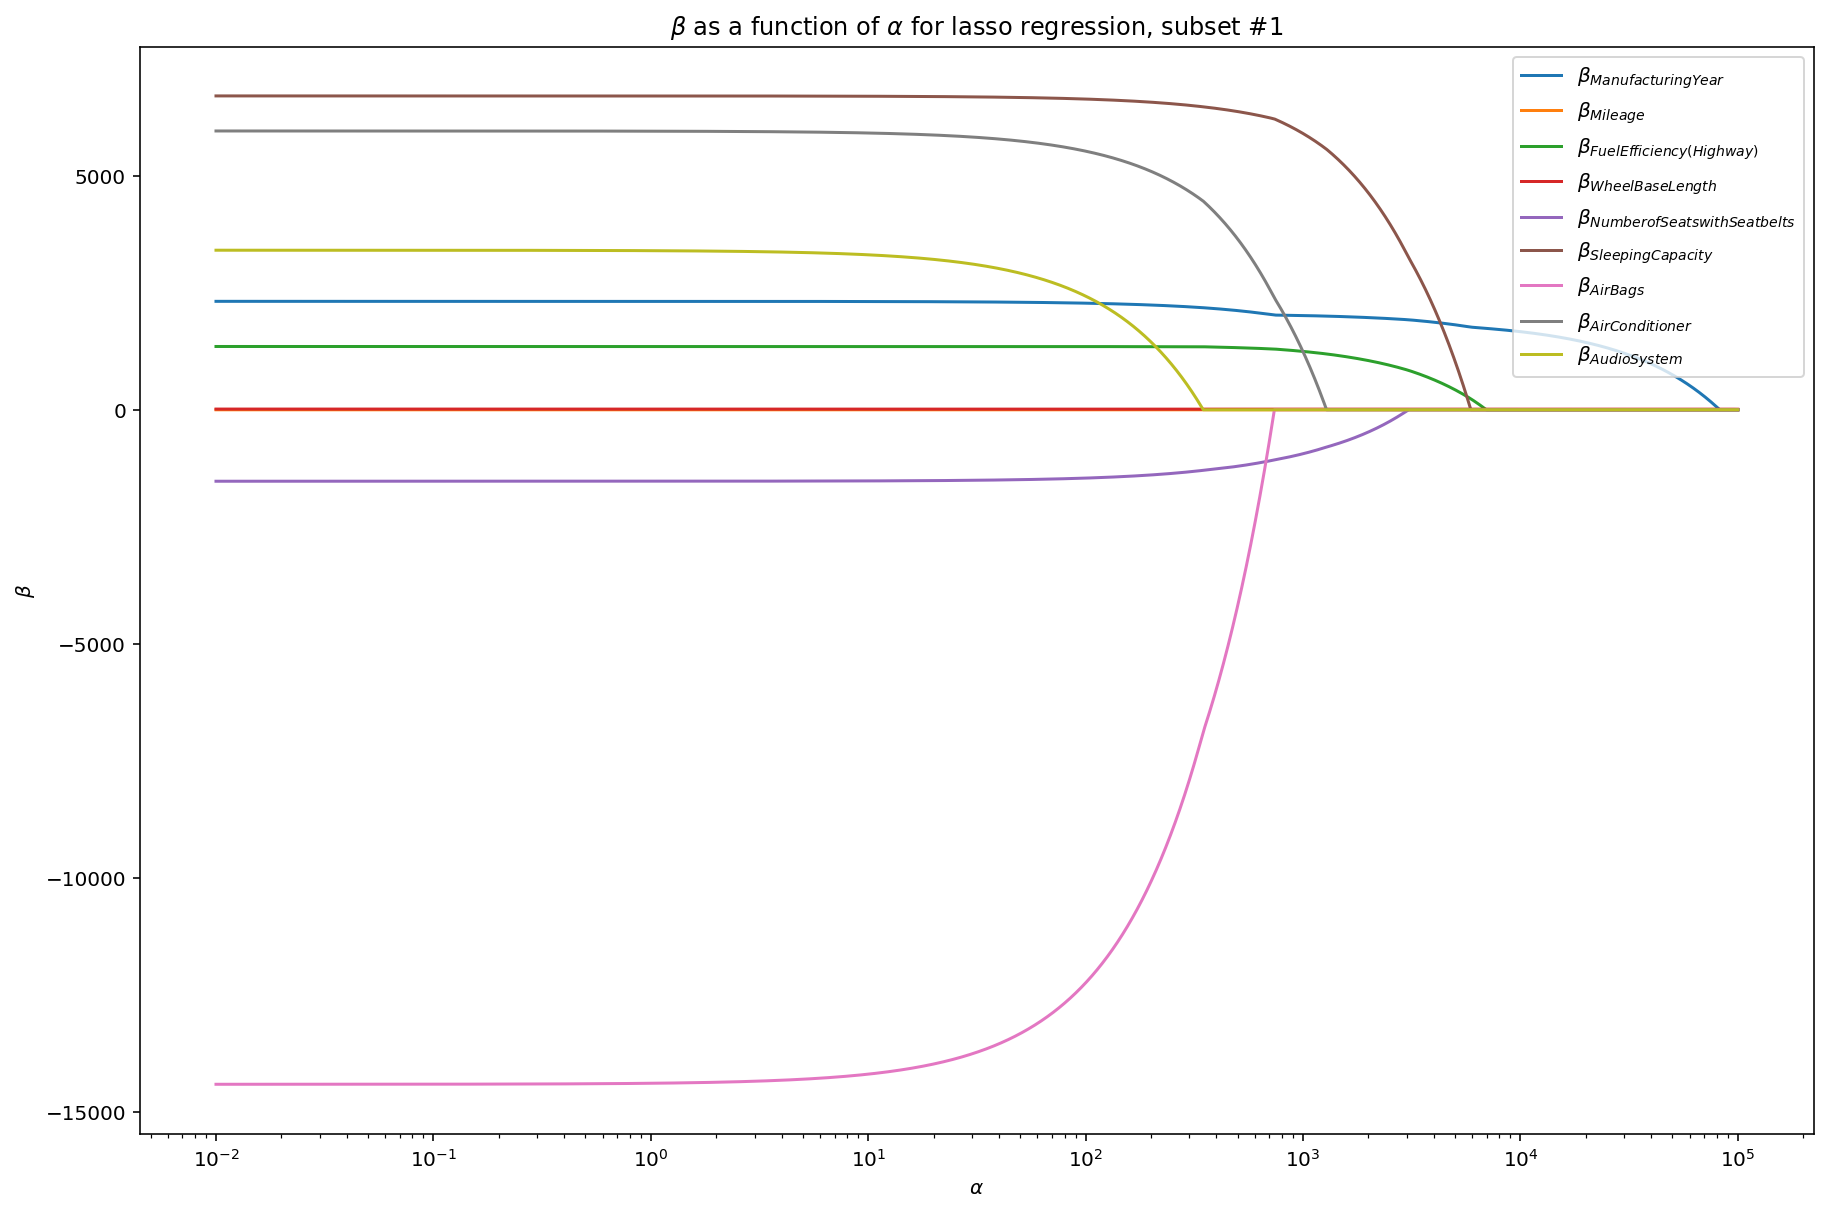

In [7]:
# visualize lassoing of all features and take the best two features from each subset
lasso_features = []

#subset1
n_alphas = 10000
min_alpha_exp = -2
max_alpha_exp = 5
n_features = len(feats_subset1.columns)
coefs = np.zeros((n_alphas, n_features))
alphas = np.logspace(min_alpha_exp, max_alpha_exp, n_alphas)
for i, alpha in enumerate(alphas):
    #model = Pipeline([('standardize', StandardScaler()), ('lasso', Lasso(alpha=alpha))])
    model = Lasso(alpha=alpha)
    model.fit(feats_subset1,train_target_all_features)
    #coefs[i] = model.steps[1][1].coef_
    coefs[i] = model.coef_

columns = list(feats_subset1.columns)
fig, ax = plt.subplots(figsize=(15,10))

for feature in range(n_features):
    sns.lineplot(alphas, coefs[:, feature], label="$\\beta_{{{}}}$".format(columns[feature]))

ax.set_xscale('log')
ax.set_title('$\\beta$ as a function of $\\alpha$ for lasso regression, subset #1')
ax.set_xlabel('$\\alpha$')
ax.set_ylabel('$\\beta$')
ax.legend(loc='upper right')  

In [8]:
lasso_features.append('Manufacturing Year')
#lasso_features.append('Fuel Efficiency (Highway)')

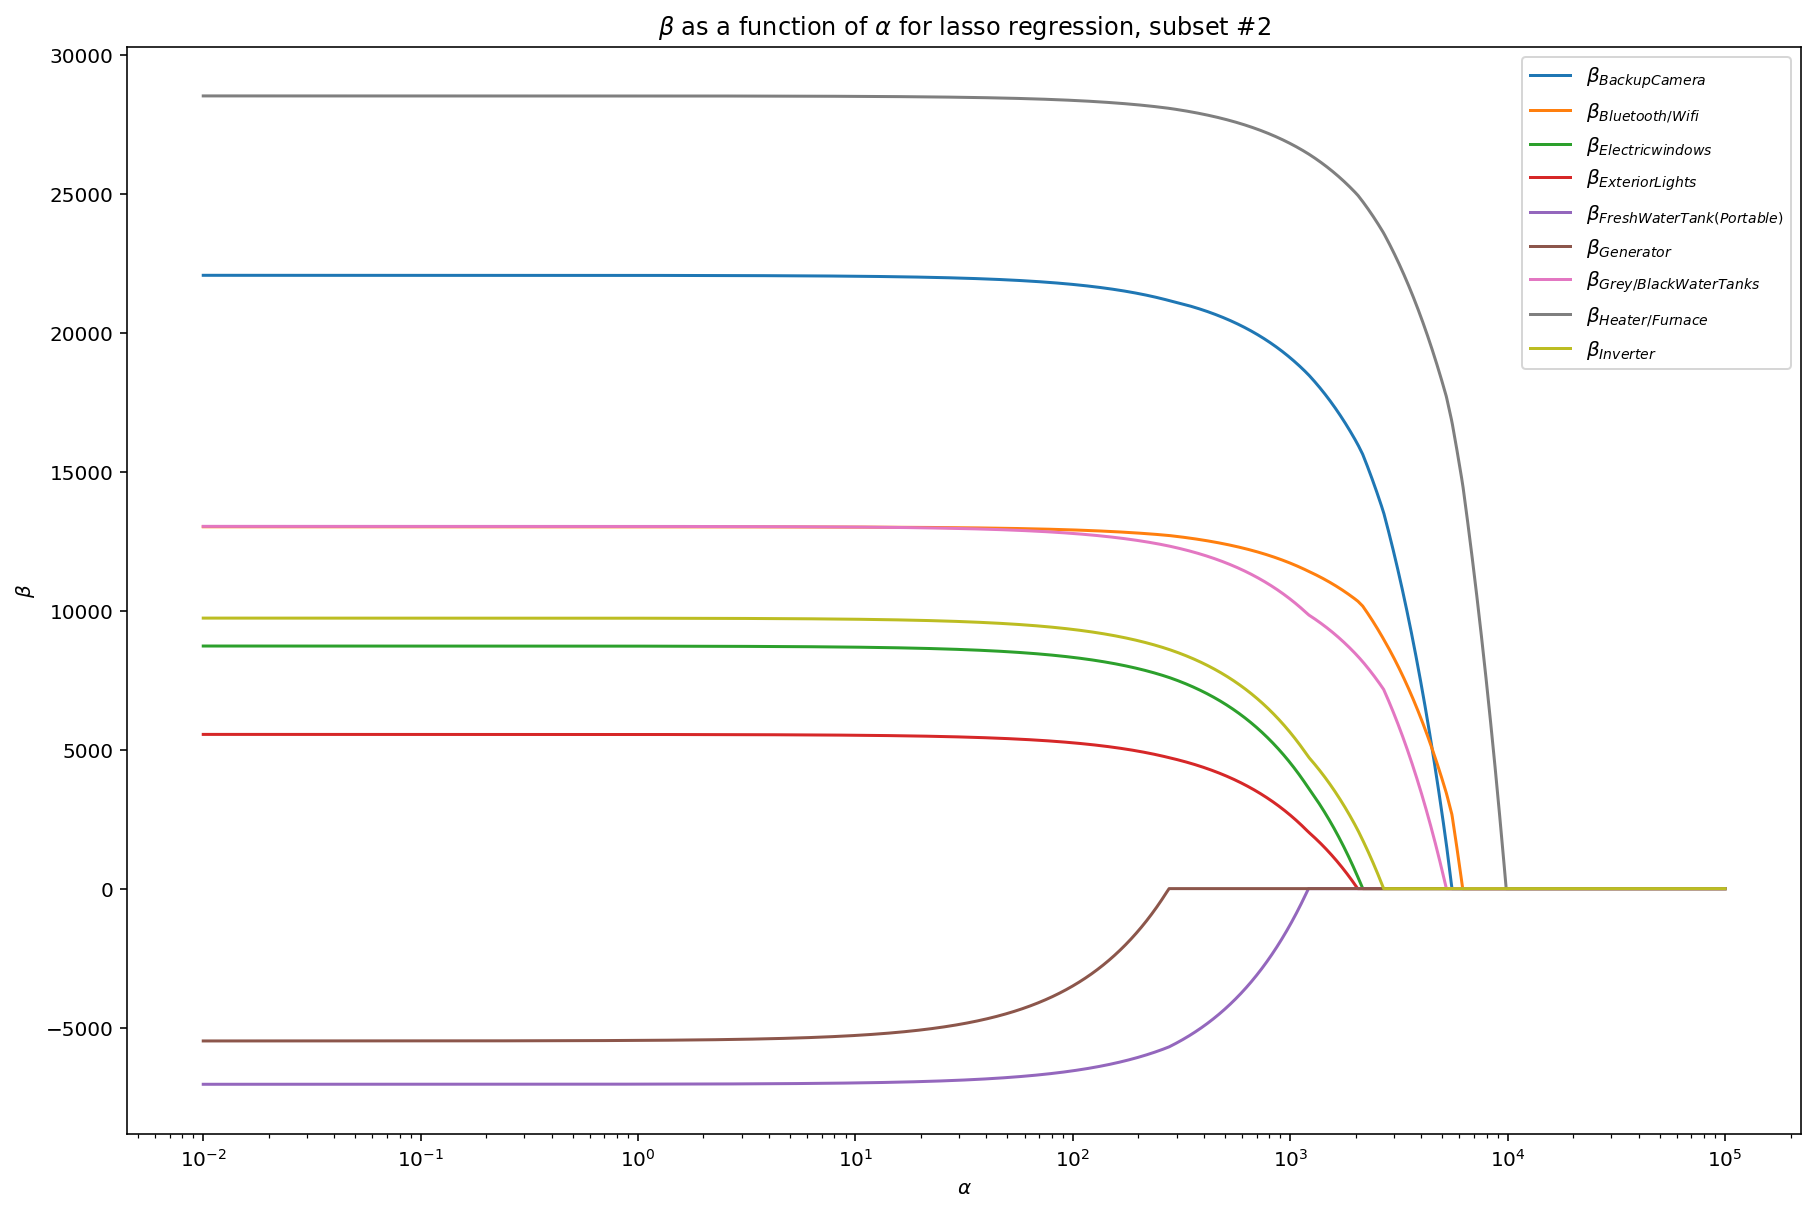

In [9]:
#subset2
n_alphas = 10000
min_alpha_exp = -2
max_alpha_exp = 5
n_features = len(feats_subset2.columns)
coefs = np.zeros((n_alphas, n_features))
alphas = np.logspace(min_alpha_exp, max_alpha_exp, n_alphas)
for i, alpha in enumerate(alphas):
    #model = Pipeline([('standardize', StandardScaler()), ('lasso', Lasso(alpha=alpha))])
    model = Lasso(alpha=alpha)
    model.fit(feats_subset2,train_target_all_features)
    #coefs[i] = model.steps[1][1].coef_
    coefs[i] = model.coef_

columns = list(feats_subset2.columns)
fig, ax = plt.subplots(figsize=(15,10))

for feature in range(n_features):
    sns.lineplot(alphas, coefs[:, feature], label="$\\beta_{{{}}}$".format(columns[feature]))

ax.set_xscale('log')
ax.set_title('$\\beta$ as a function of $\\alpha$ for lasso regression, subset #2')
ax.set_xlabel('$\\alpha$')
ax.set_ylabel('$\\beta$')
ax.legend(loc='upper right')  

In [10]:
lasso_features.append('Heater / Furnace')
#lasso_features.append('Bluetooth / Wifi')

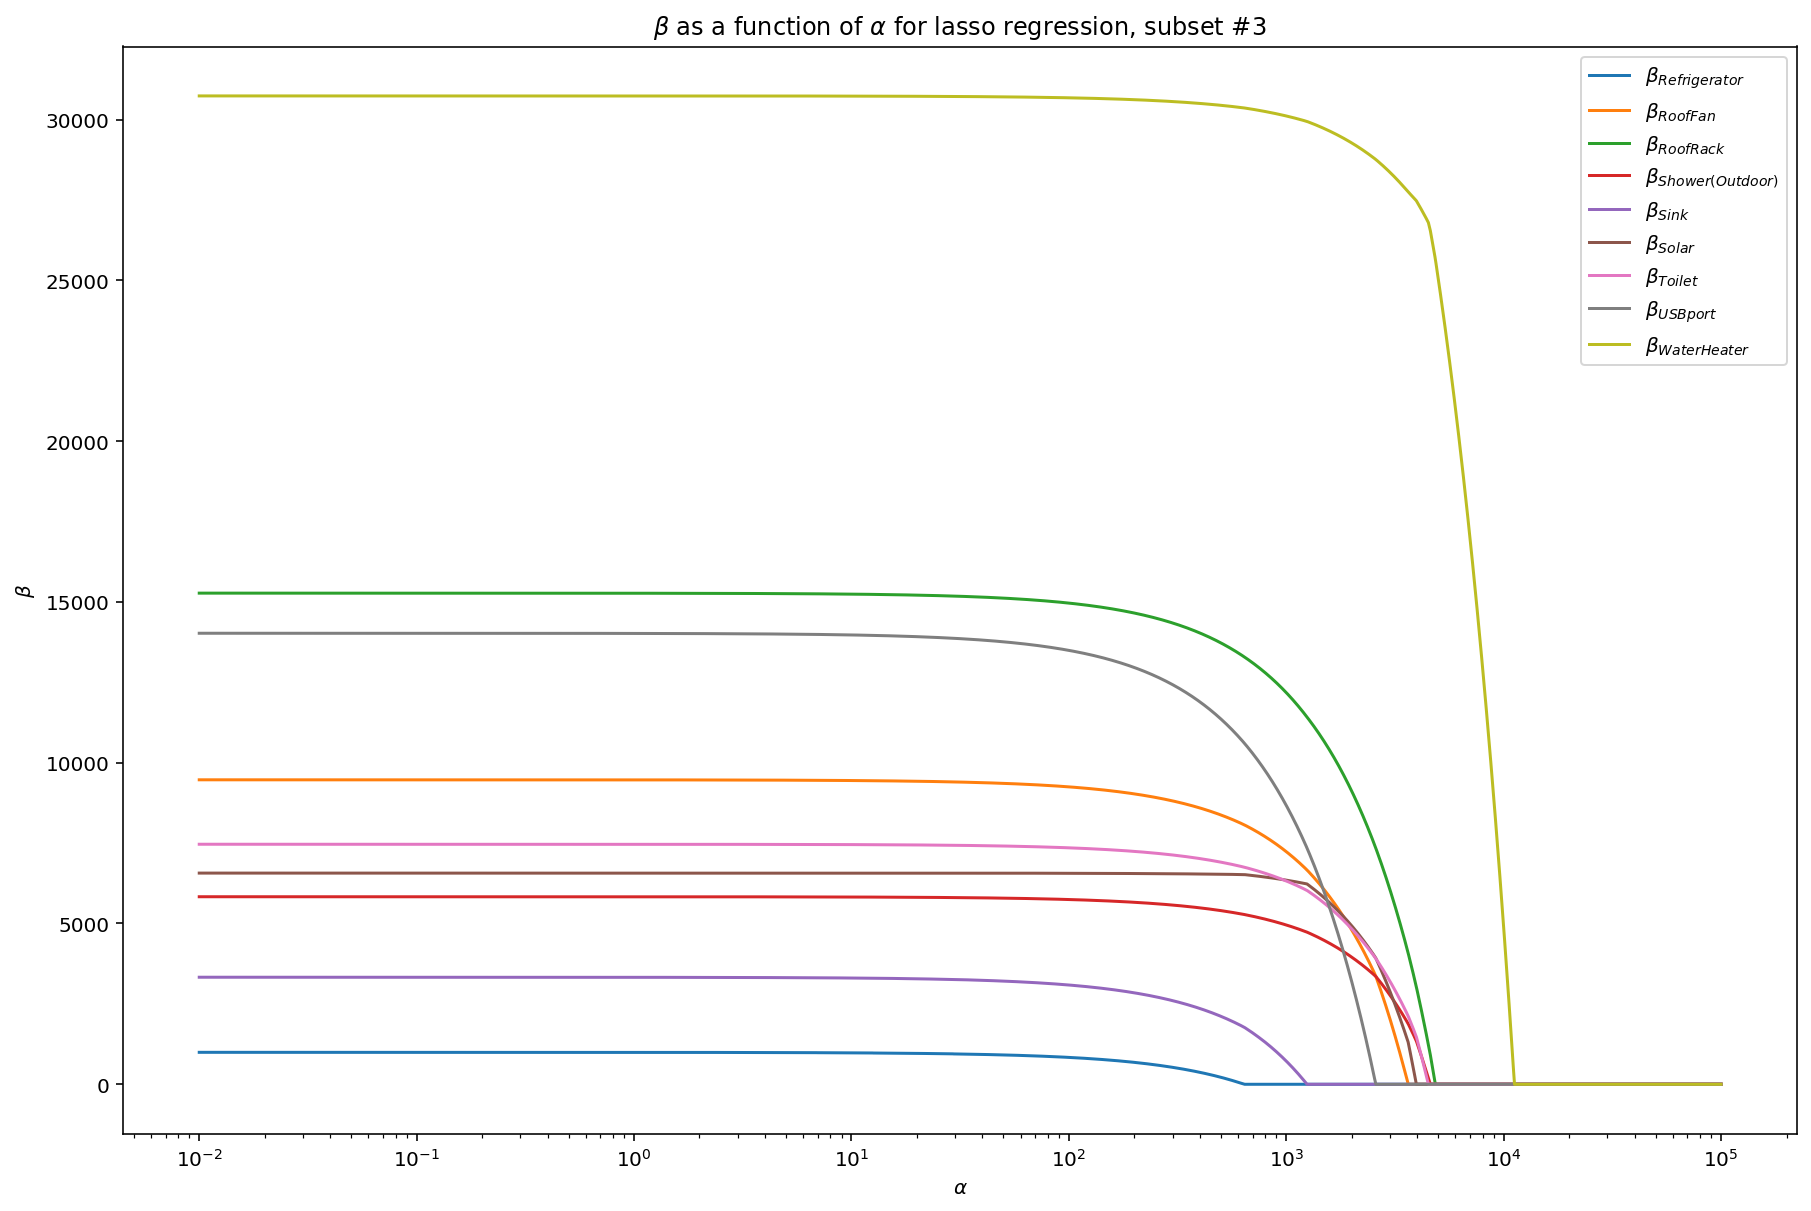

In [11]:
#subset3
n_alphas = 10000
min_alpha_exp = -2
max_alpha_exp = 5
n_features = len(feats_subset3.columns)
coefs = np.zeros((n_alphas, n_features))
alphas = np.logspace(min_alpha_exp, max_alpha_exp, n_alphas)
for i, alpha in enumerate(alphas):
    #model = Pipeline([('standardize', StandardScaler()), ('lasso', Lasso(alpha=alpha))])
    model = Lasso(alpha=alpha)
    model.fit(feats_subset3,train_target_all_features)
    #coefs[i] = model.steps[1][1].coef_
    coefs[i] = model.coef_

columns = list(feats_subset3.columns)
fig, ax = plt.subplots(figsize=(15,10))

for feature in range(n_features):
    sns.lineplot(alphas, coefs[:, feature], label="$\\beta_{{{}}}$".format(columns[feature]))

ax.set_xscale('log')
ax.set_title('$\\beta$ as a function of $\\alpha$ for lasso regression, subset #3')
ax.set_xlabel('$\\alpha$')
ax.set_ylabel('$\\beta$')
ax.legend(loc='upper right')  

In [12]:
lasso_features.append('Water Heater')
lasso_features.append('Roof Rack')

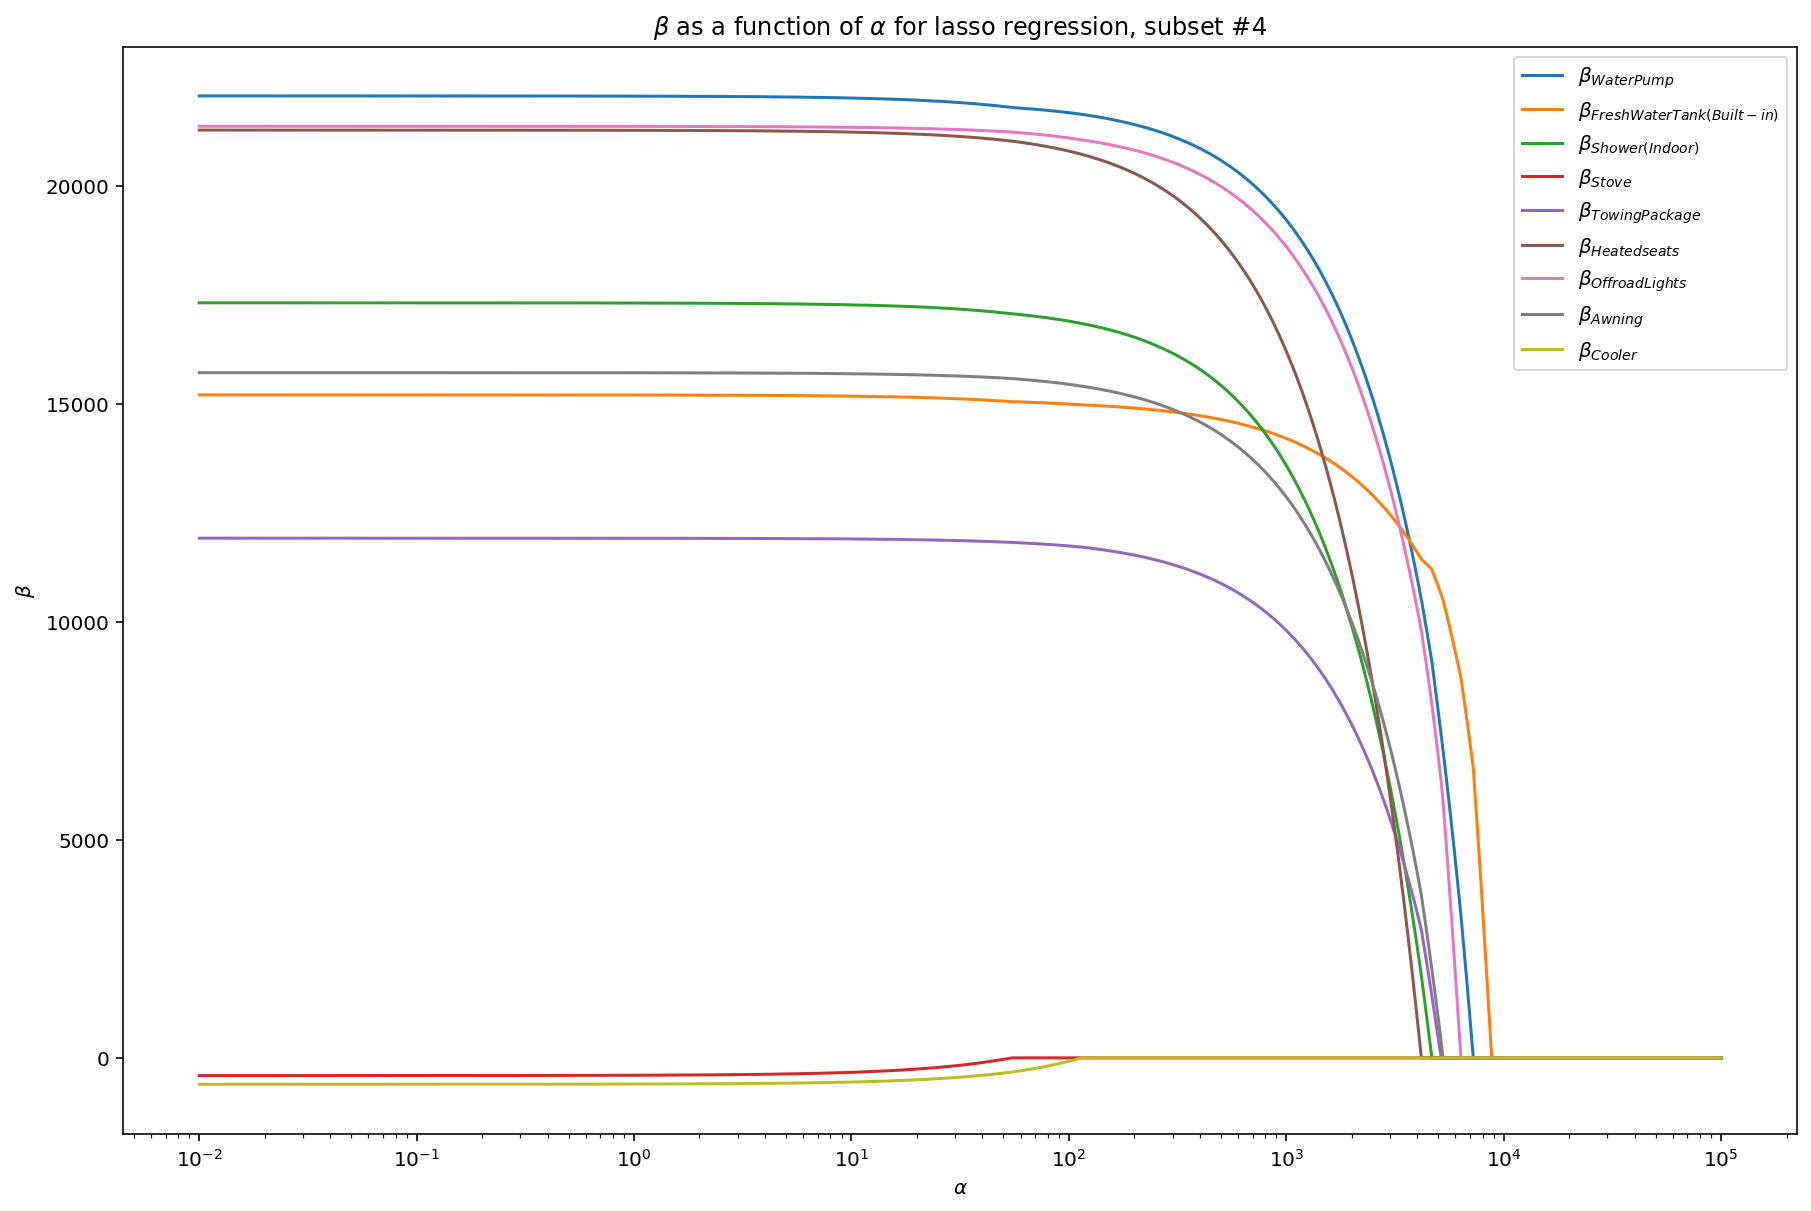

In [13]:
#subset4
n_alphas = 10000
min_alpha_exp = -2
max_alpha_exp = 5
n_features = len(feats_subset4.columns)
coefs = np.zeros((n_alphas, n_features))
alphas = np.logspace(min_alpha_exp, max_alpha_exp, n_alphas)
for i, alpha in enumerate(alphas):
    #model = Pipeline([('standardize', StandardScaler()), ('lasso', Lasso(alpha=alpha))])
    model = Lasso(alpha=alpha)
    model.fit(feats_subset4,train_target_all_features)
    #coefs[i] = model.steps[1][1].coef_
    coefs[i] = model.coef_

columns = list(feats_subset4.columns)
fig, ax = plt.subplots(figsize=(15,10))

for feature in range(n_features):
    sns.lineplot(alphas, coefs[:, feature], label="$\\beta_{{{}}}$".format(columns[feature]))

ax.set_xscale('log')
ax.set_title('$\\beta$ as a function of $\\alpha$ for lasso regression, subset #4')
ax.set_xlabel('$\\alpha$')
ax.set_ylabel('$\\beta$')
ax.legend(loc='upper right')  

In [14]:
lasso_features.append('Fresh Water Tank (Built-in)')
lasso_features.append('Water Pump')

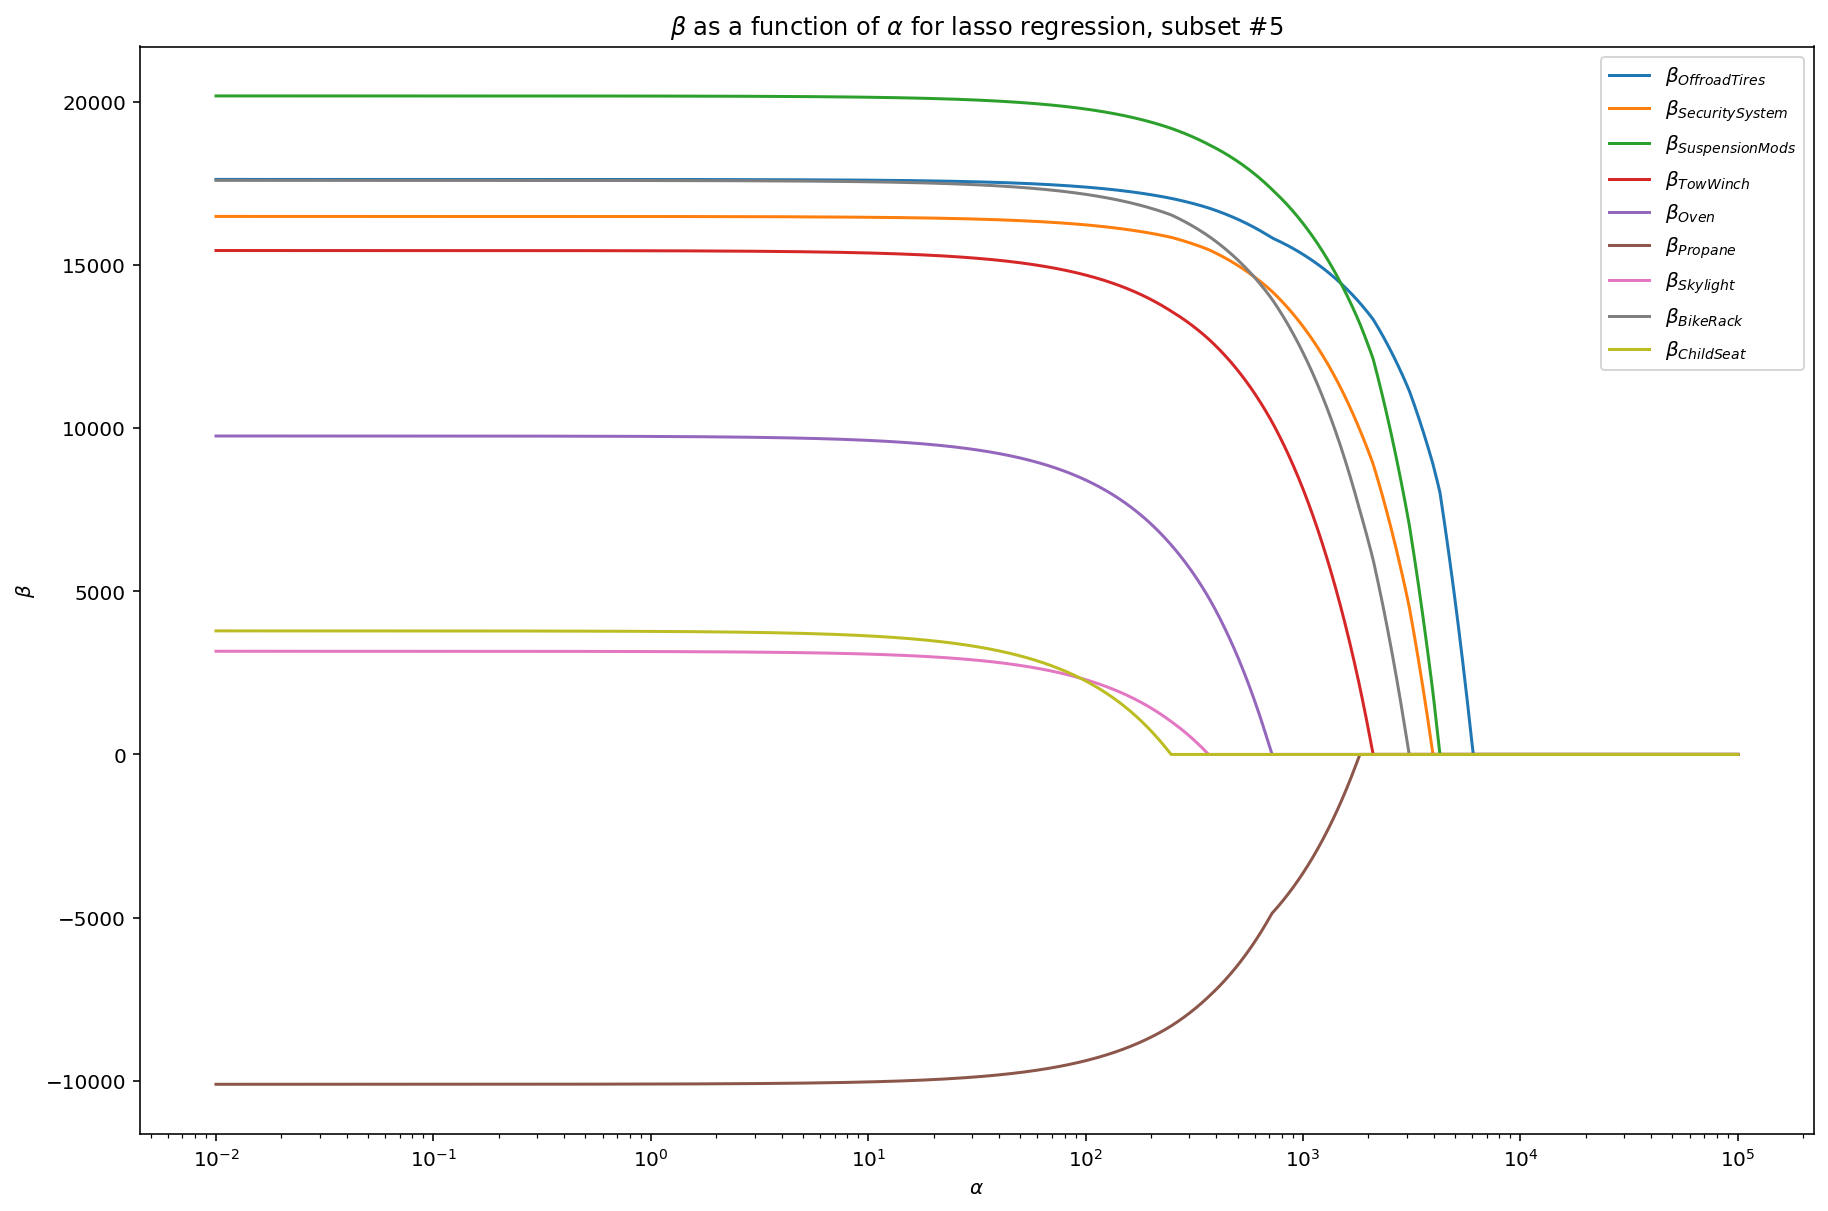

In [15]:
#subset5
n_alphas = 10000
min_alpha_exp = -2
max_alpha_exp = 5
n_features = len(feats_subset5.columns)
coefs = np.zeros((n_alphas, n_features))
alphas = np.logspace(min_alpha_exp, max_alpha_exp, n_alphas)
for i, alpha in enumerate(alphas):
    #model = Pipeline([('standardize', StandardScaler()), ('lasso', Lasso(alpha=alpha))])
    model = Lasso(alpha=alpha)
    model.fit(feats_subset5,train_target_all_features)
    #coefs[i] = model.steps[1][1].coef_
    coefs[i] = model.coef_

columns = list(feats_subset5.columns)
fig, ax = plt.subplots(figsize=(15,10))

for feature in range(n_features):
    sns.lineplot(alphas, coefs[:, feature], label="$\\beta_{{{}}}$".format(columns[feature]))

ax.set_xscale('log')
ax.set_title('$\\beta$ as a function of $\\alpha$ for lasso regression, subset #5')
ax.set_xlabel('$\\alpha$')
ax.set_ylabel('$\\beta$')
ax.legend(loc='upper right')  

In [16]:
#lasso_features.append('Offroad Tires')
lasso_features.append('Suspension Mods')

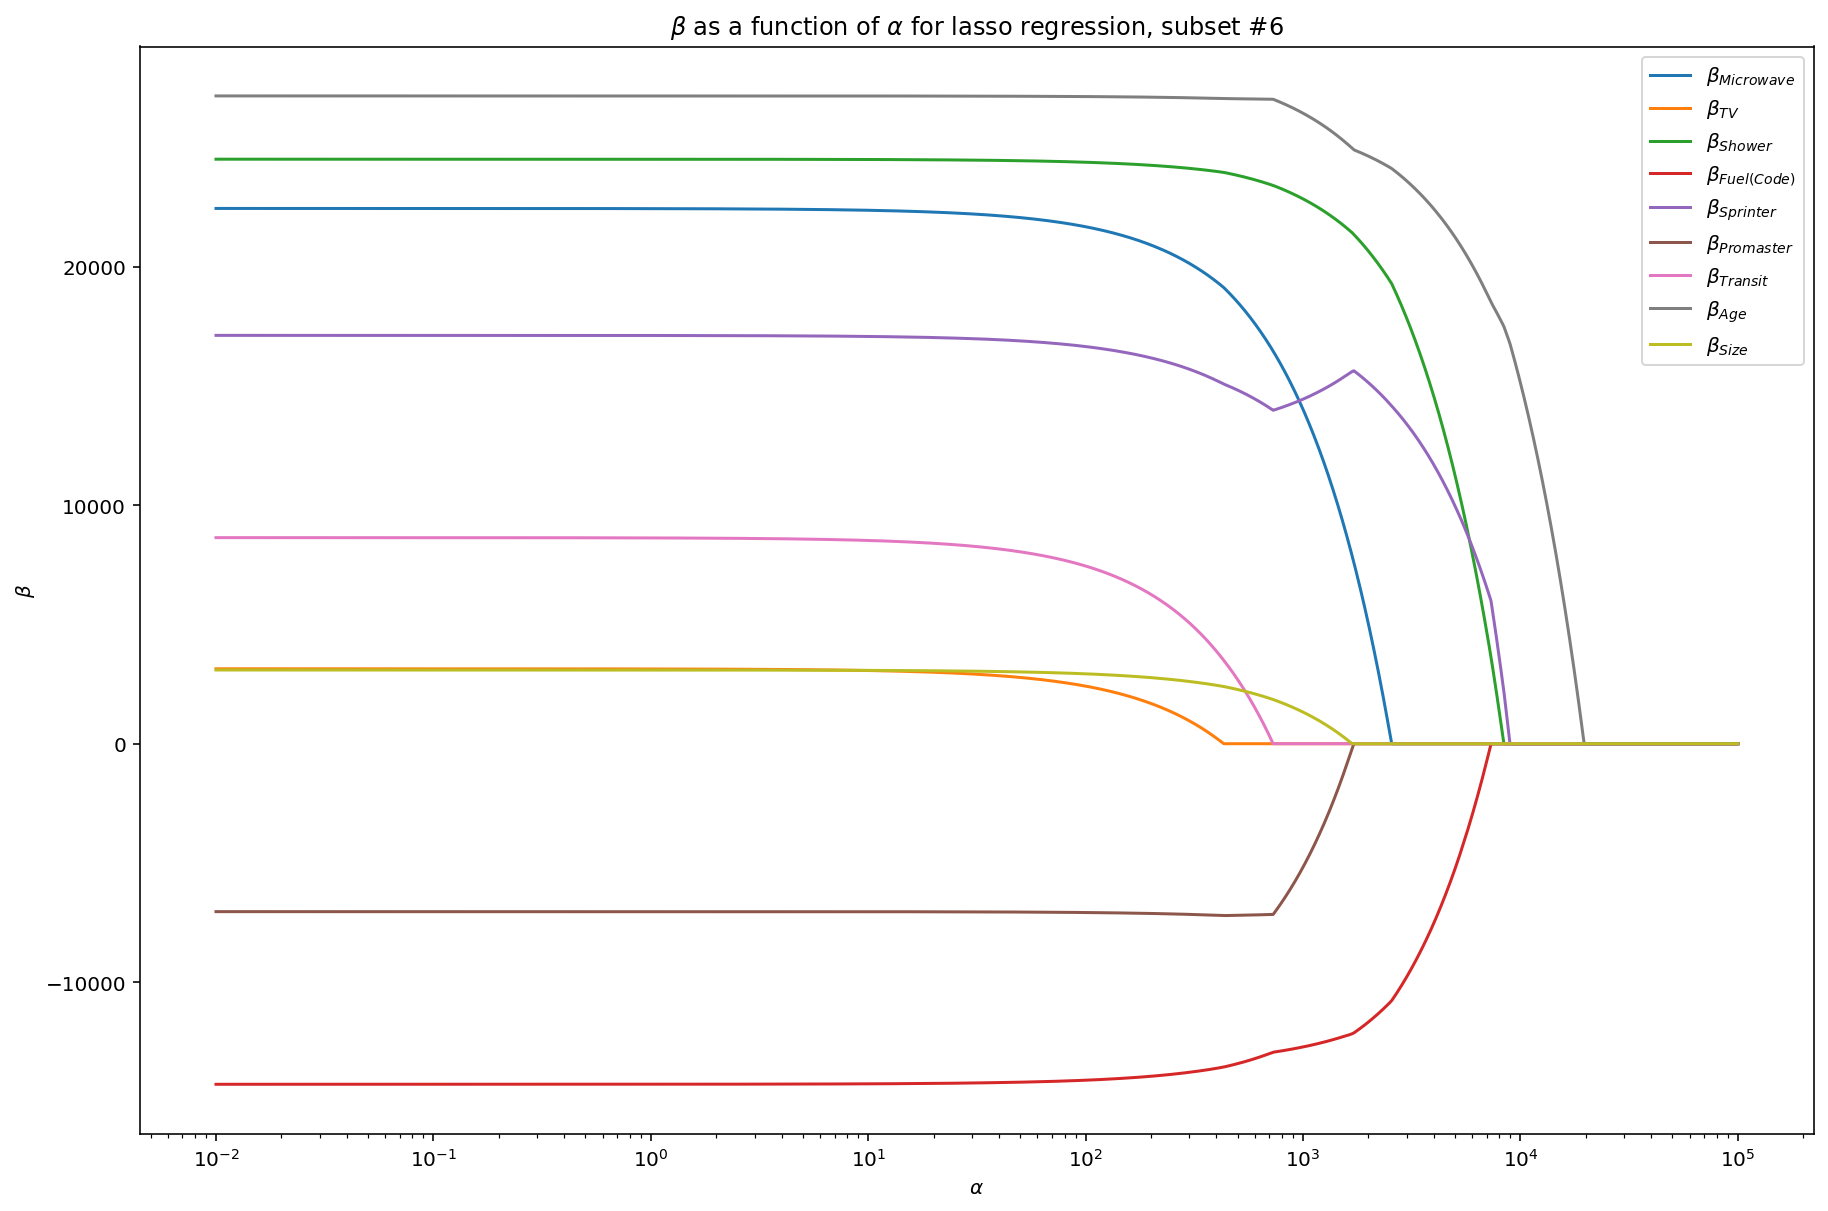

In [17]:
#subset6
n_alphas = 10000
min_alpha_exp = -2
max_alpha_exp = 5
n_features = len(feats_subset6.columns)
coefs = np.zeros((n_alphas, n_features))
alphas = np.logspace(min_alpha_exp, max_alpha_exp, n_alphas)
for i, alpha in enumerate(alphas):
    #model = Pipeline([('standardize', StandardScaler()), ('lasso', Lasso(alpha=alpha))])
    model = Lasso(alpha=alpha)
    model.fit(feats_subset6,train_target_all_features)
    #coefs[i] = model.steps[1][1].coef_
    coefs[i] = model.coef_

columns = list(feats_subset6.columns)
fig, ax = plt.subplots(figsize=(15,10))

for feature in range(n_features):
    sns.lineplot(alphas, coefs[:, feature], label="$\\beta_{{{}}}$".format(columns[feature]))

ax.set_xscale('log')
ax.set_title('$\\beta$ as a function of $\\alpha$ for lasso regression, subset #6')
ax.set_xlabel('$\\alpha$')
ax.set_ylabel('$\\beta$')
ax.legend(loc='upper right')  

In [18]:
#lasso_features.append('Shower')
lasso_features.append('Sprinter')

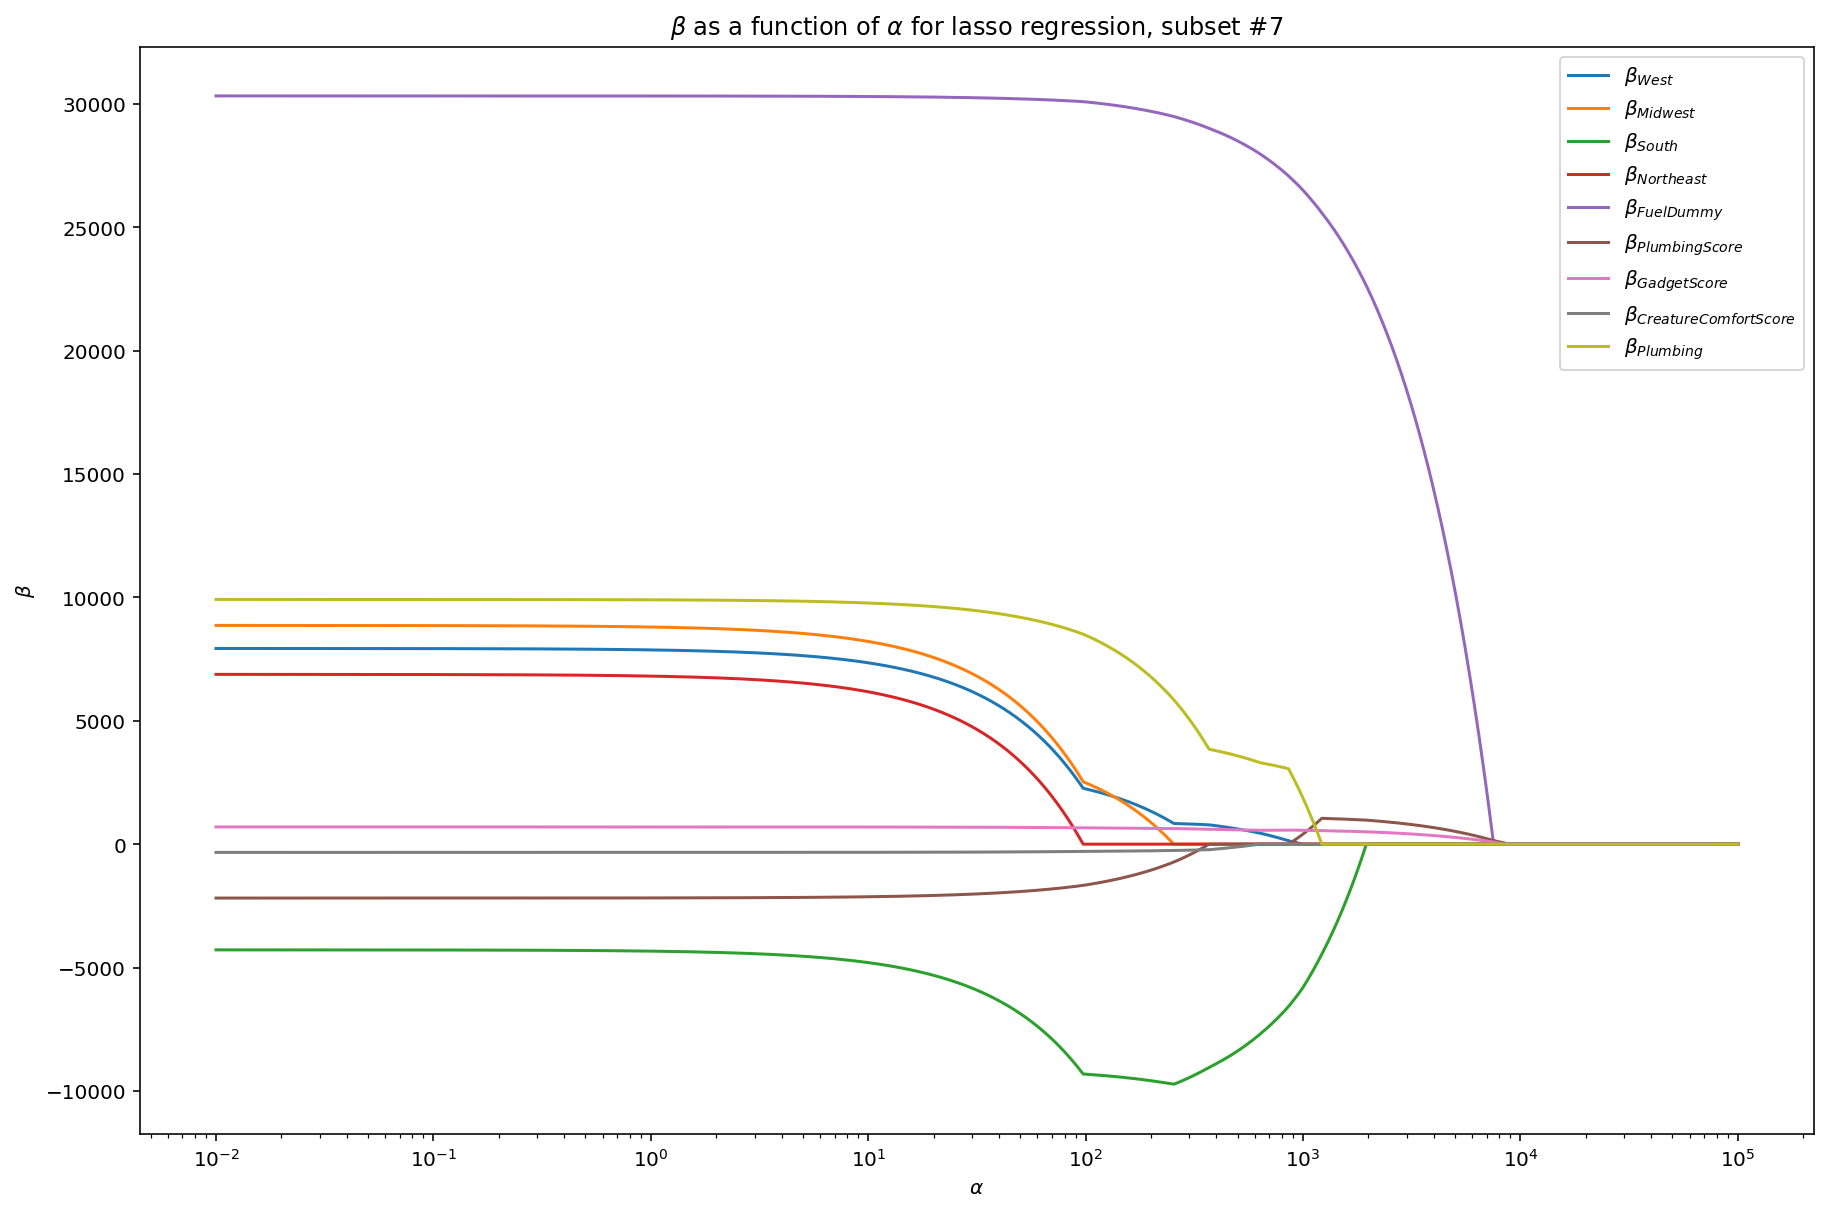

In [19]:
#subset7
n_alphas = 10000
min_alpha_exp = -2
max_alpha_exp = 5
n_features = len(feats_subset7.columns)
coefs = np.zeros((n_alphas, n_features))
alphas = np.logspace(min_alpha_exp, max_alpha_exp, n_alphas)
for i, alpha in enumerate(alphas):
    #model = Pipeline([('standardize', StandardScaler()), ('lasso', Lasso(alpha=alpha))])
    model = Lasso(alpha=alpha)
    model.fit(feats_subset7,train_target_all_features)
    #coefs[i] = model.steps[1][1].coef_
    coefs[i] = model.coef_

columns = list(feats_subset7.columns)
fig, ax = plt.subplots(figsize=(15,10))

for feature in range(n_features):
    sns.lineplot(alphas, coefs[:, feature], label="$\\beta_{{{}}}$".format(columns[feature]))

ax.set_xscale('log')
ax.set_title('$\\beta$ as a function of $\\alpha$ for lasso regression, subset #7')
ax.set_xlabel('$\\alpha$')
ax.set_ylabel('$\\beta$')
ax.legend(loc='upper right')  

In [20]:
lasso_features.append('West')
lasso_features.append('Fuel Dummy')
#lasso_features.append('Plumbing Score')
#lasso_features.append('Gadget Score')

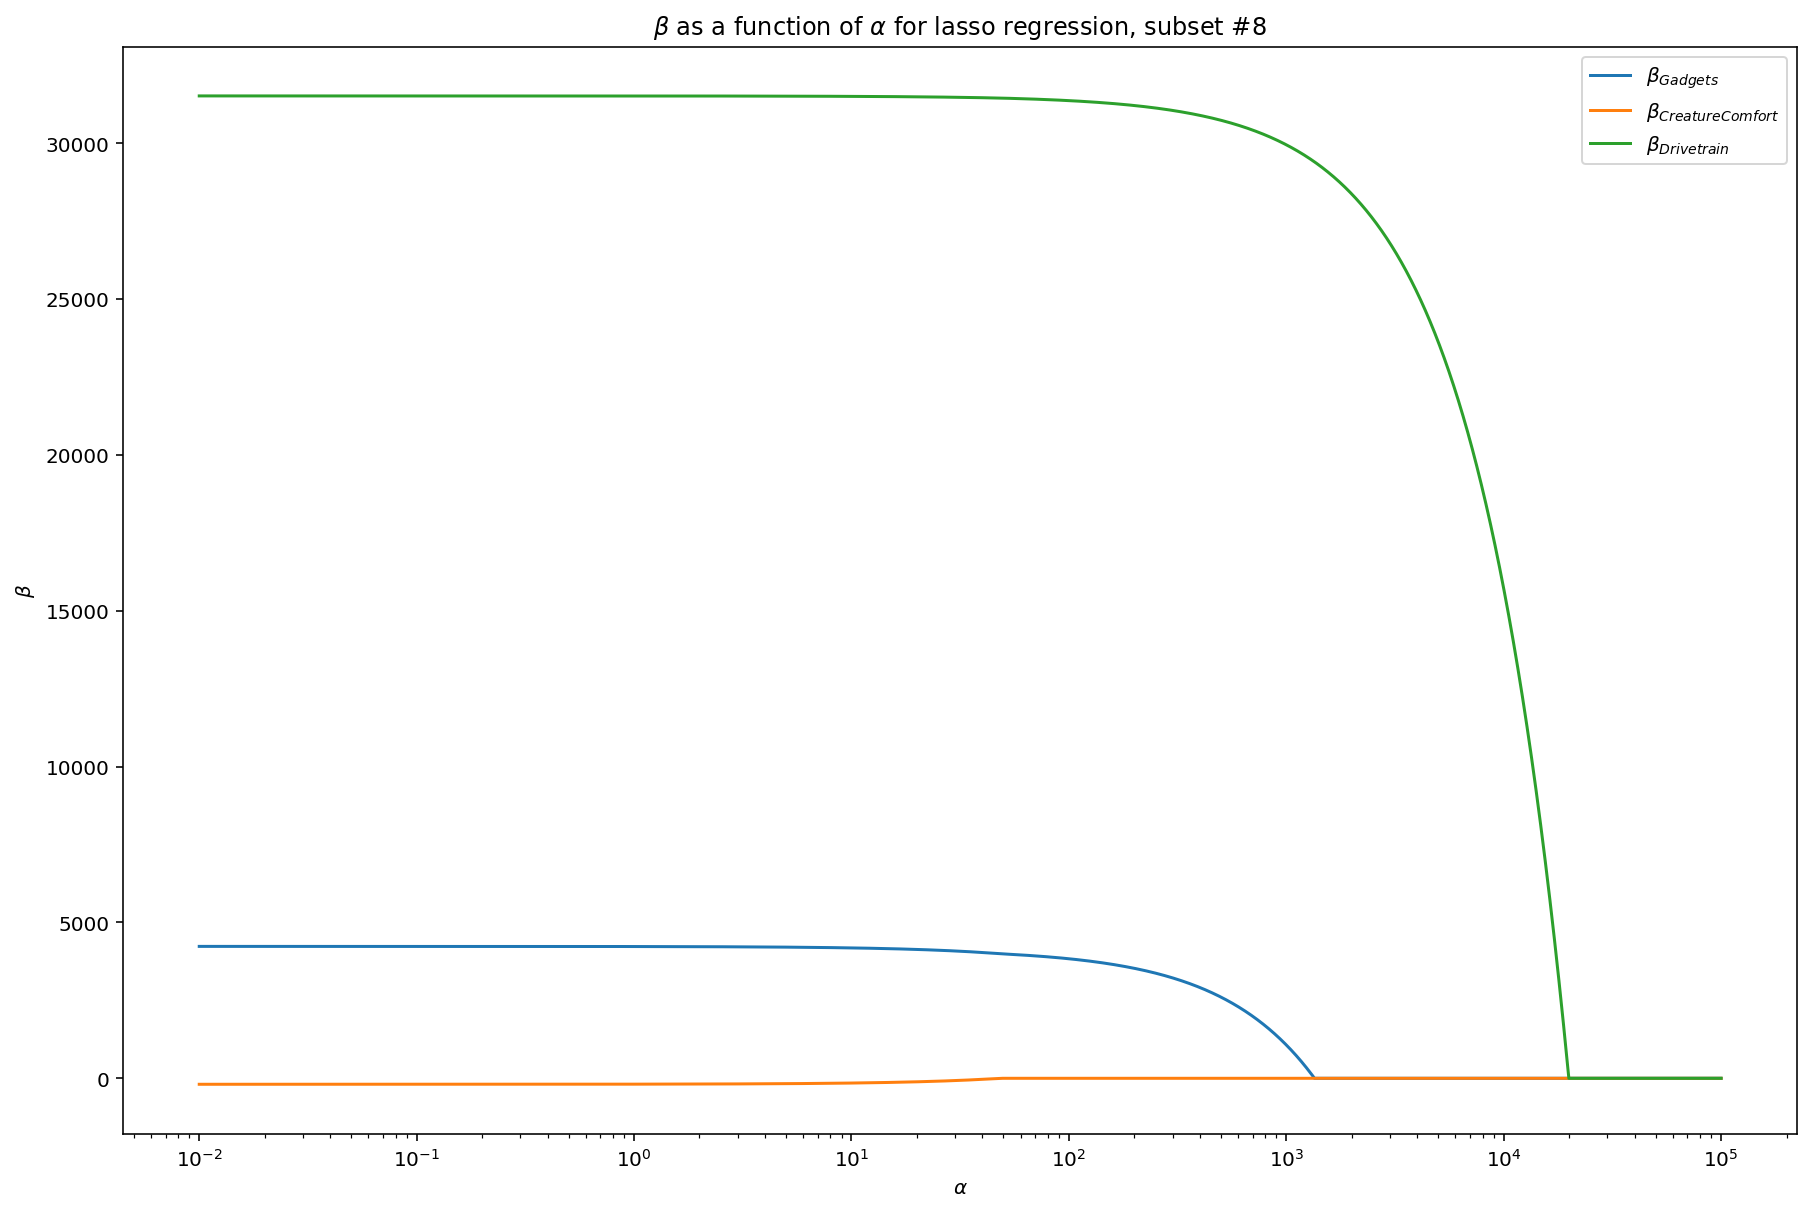

In [21]:
#subset8
n_alphas = 10000
min_alpha_exp = -2
max_alpha_exp = 5
n_features = len(feats_subset8.columns)
coefs = np.zeros((n_alphas, n_features))
alphas = np.logspace(min_alpha_exp, max_alpha_exp, n_alphas)
for i, alpha in enumerate(alphas):
    #model = Pipeline([('standardize', StandardScaler()), ('lasso', Lasso(alpha=alpha))])
    model = Lasso(alpha=alpha)
    model.fit(feats_subset8,train_target_all_features)
    #coefs[i] = model.steps[1][1].coef_
    coefs[i] = model.coef_

columns = list(feats_subset8.columns)
fig, ax = plt.subplots(figsize=(15,10))

for feature in range(n_features):
    sns.lineplot(alphas, coefs[:, feature], label="$\\beta_{{{}}}$".format(columns[feature]))

ax.set_xscale('log')
ax.set_title('$\\beta$ as a function of $\\alpha$ for lasso regression, subset #8')
ax.set_xlabel('$\\alpha$')
ax.set_ylabel('$\\beta$')
ax.legend(loc='upper right')  

In [22]:
lasso_features.append('Drivetrain')

In [23]:
#lasso_features

# Ridge Regularization

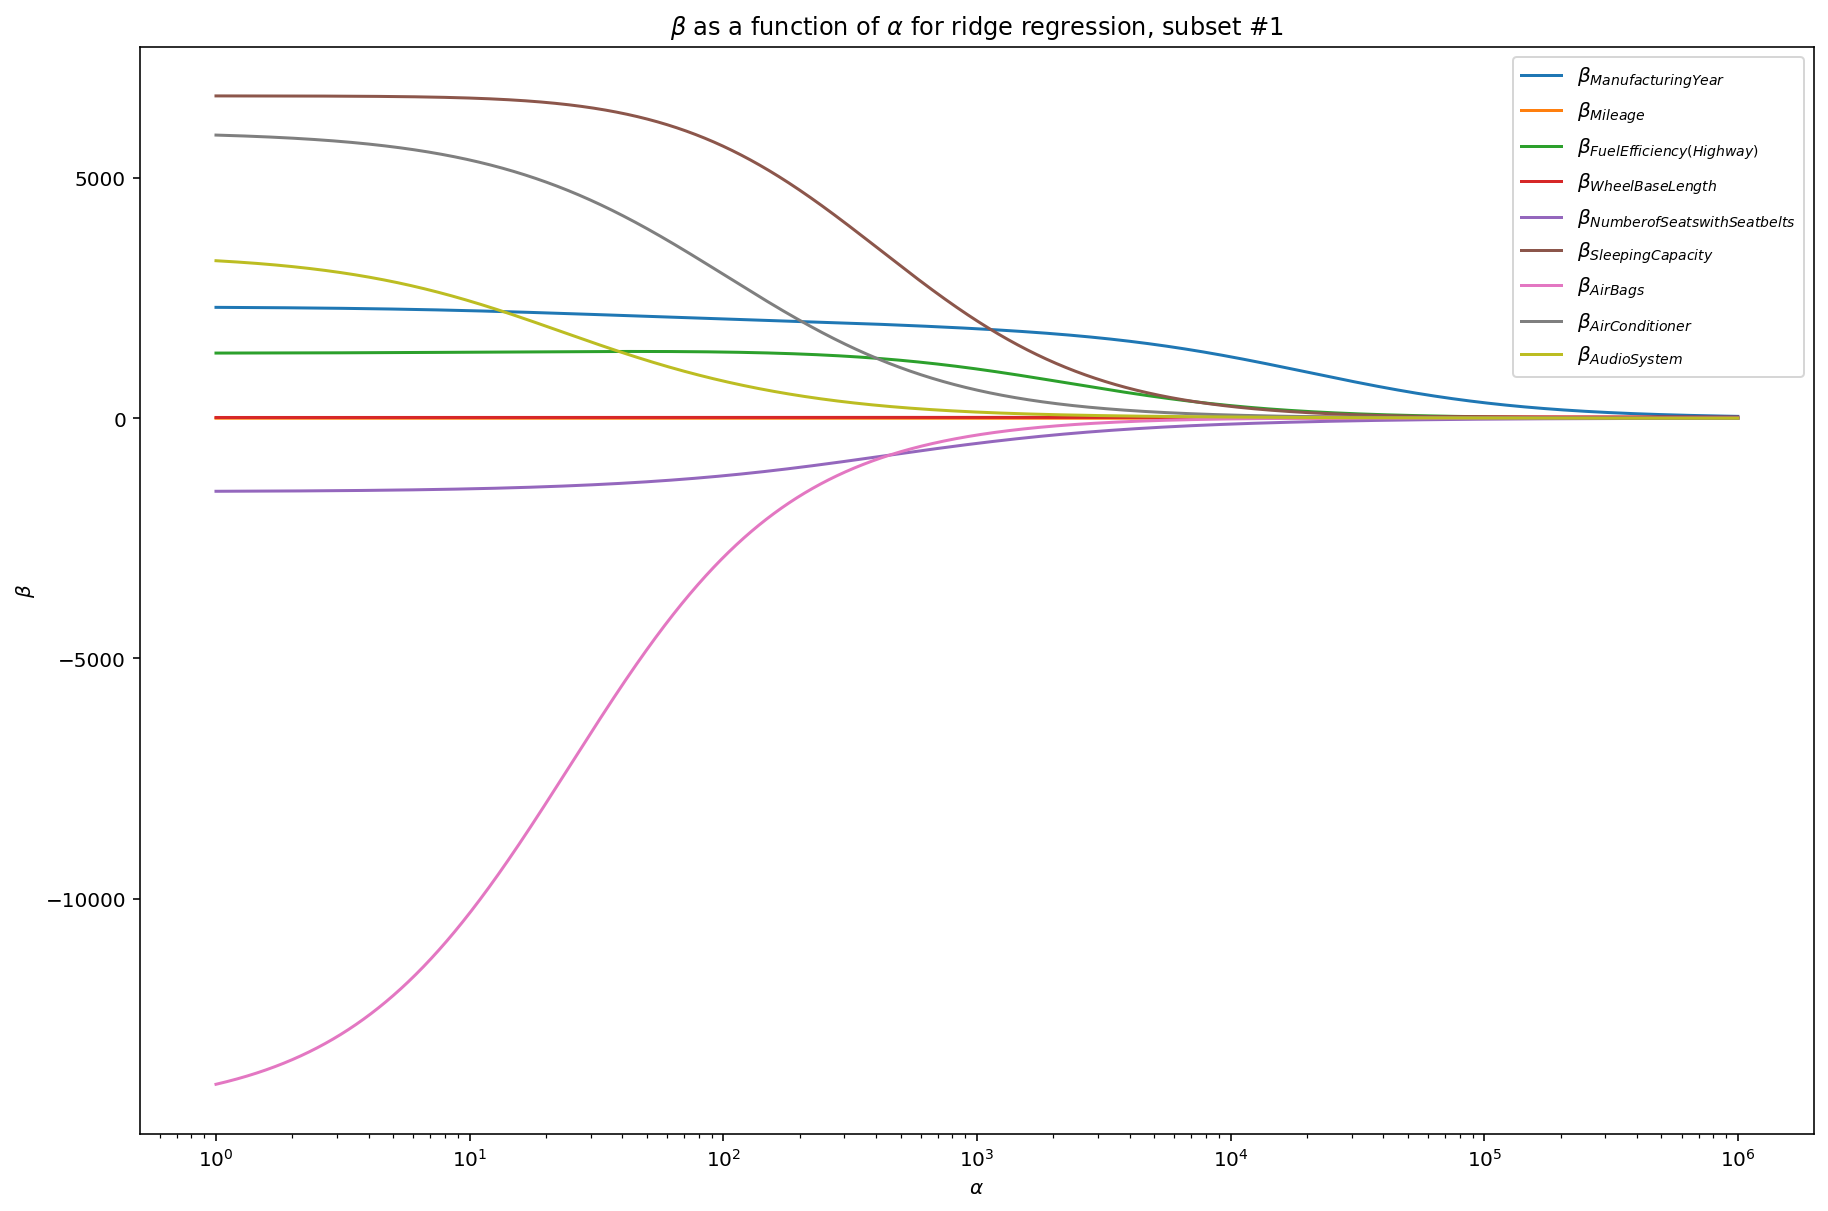

In [24]:
# visualize ridge of all features and take the best two features from each subset
ridge_features = []

#subset1
nalphas = 10000
min_alpha_exp = 0
max_alpha_exp = 6
n_features = len(feats_subset1.columns)
coefs = np.zeros((n_alphas, n_features))
alphas = np.logspace(min_alpha_exp, max_alpha_exp, n_alphas)
for i, alpha in enumerate(alphas):
    #model = Pipeline([('standardize', StandardScaler()), ('lasso', Lasso(alpha=alpha))])
    model = Ridge(alpha=alpha)
    model.fit(feats_subset1,train_target_all_features)
    #coefs[i] = model.steps[1][1].coef_
    coefs[i] = model.coef_
    
columns = list(feats_subset1.columns)
fig, ax = plt.subplots(figsize=(15,10))

for feature in range(n_features):
    sns.lineplot(alphas, coefs[:, feature], label="$\\beta_{{{}}}$".format(columns[feature]))

ax.set_xscale('log')
ax.set_title('$\\beta$ as a function of $\\alpha$ for ridge regression, subset #1')
ax.set_xlabel('$\\alpha$')
ax.set_ylabel('$\\beta$')
ax.legend(loc='upper right')  

In [25]:
ridge_features.append('Manufacturing Year')
#ridge_features.append('Fuel Efficiency (Highway)')

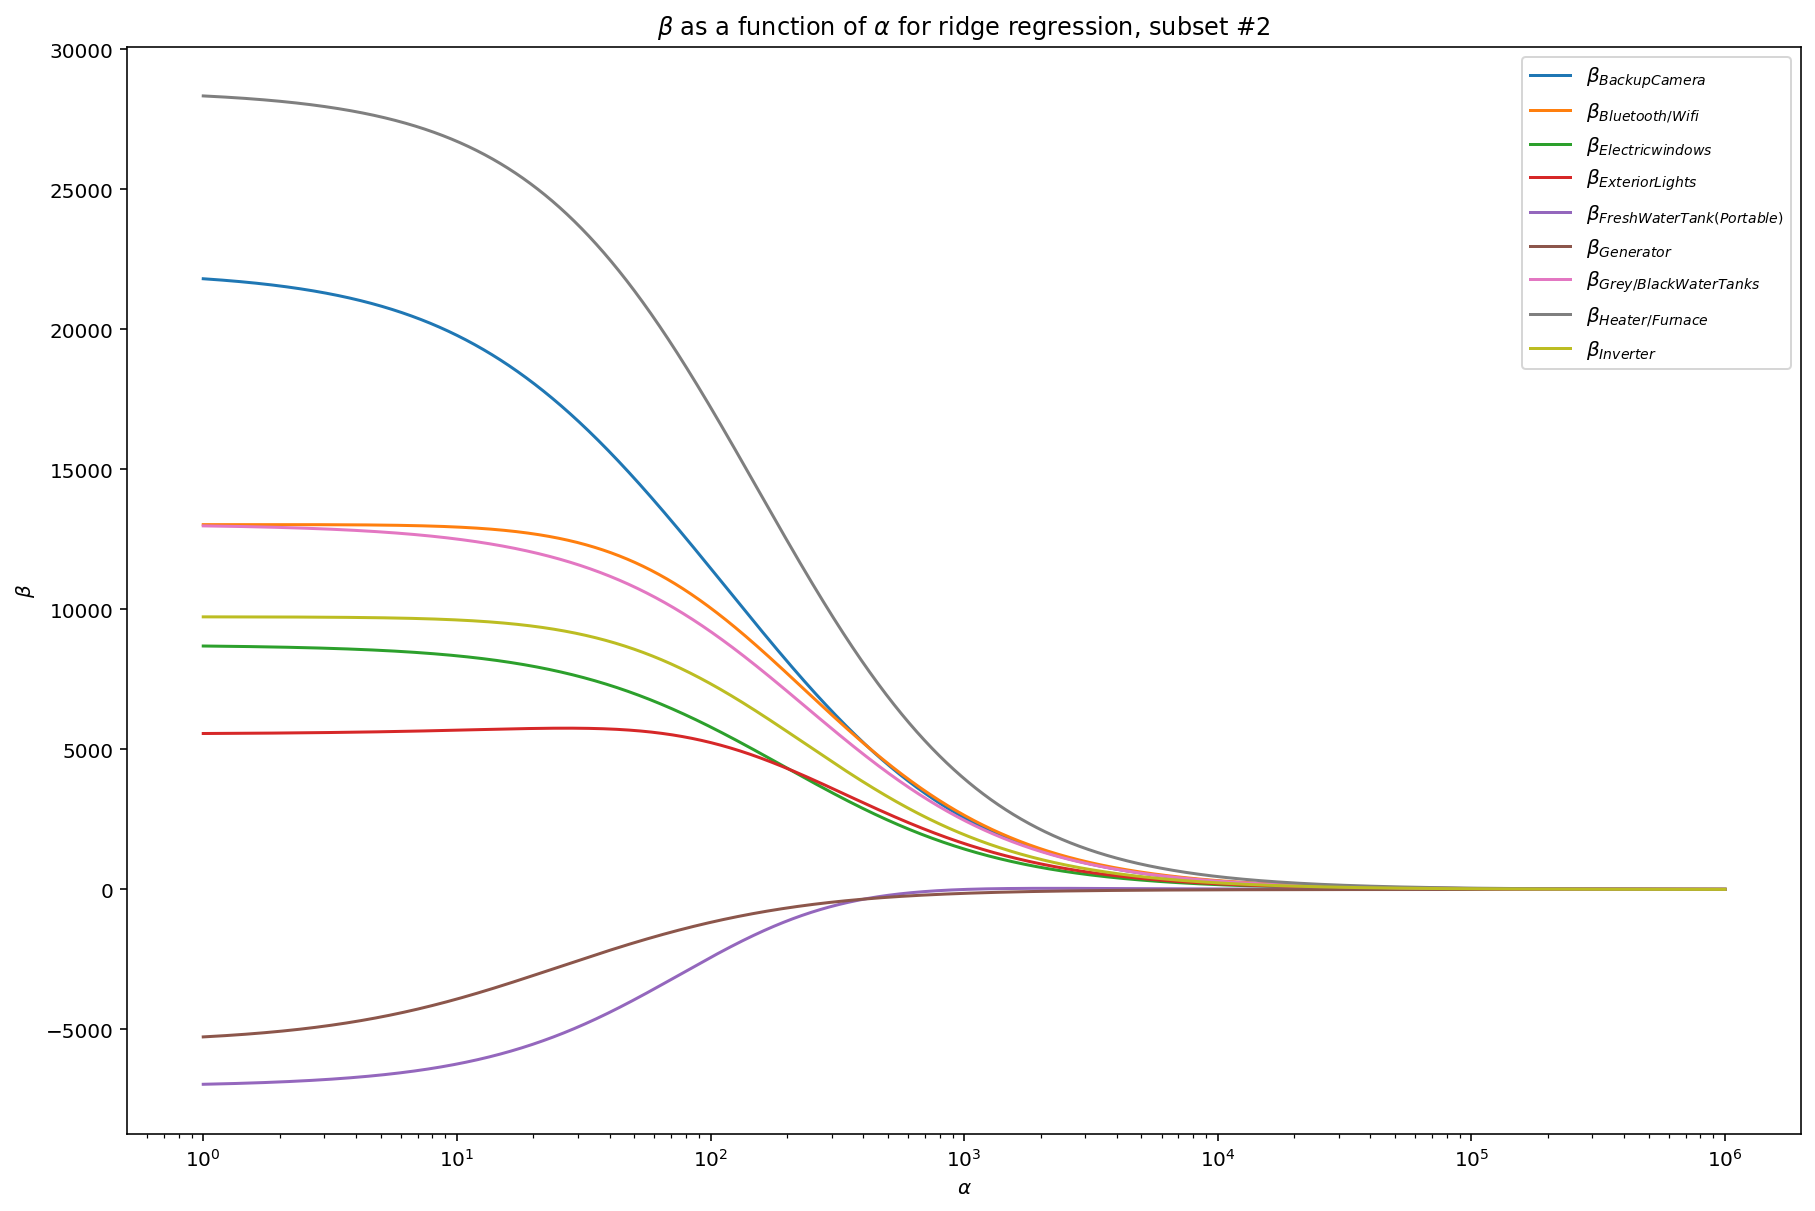

In [26]:
#subset2
nalphas = 10000
min_alpha_exp = 0
max_alpha_exp = 6
n_features = len(feats_subset2.columns)
coefs = np.zeros((n_alphas, n_features))
alphas = np.logspace(min_alpha_exp, max_alpha_exp, n_alphas)
for i, alpha in enumerate(alphas):
    #model = Pipeline([('standardize', StandardScaler()), ('lasso', Lasso(alpha=alpha))])
    model = Ridge(alpha=alpha)
    model.fit(feats_subset2,train_target_all_features)
    #coefs[i] = model.steps[1][1].coef_
    coefs[i] = model.coef_
    
columns = list(feats_subset2.columns)
fig, ax = plt.subplots(figsize=(15,10))

for feature in range(n_features):
    sns.lineplot(alphas, coefs[:, feature], label="$\\beta_{{{}}}$".format(columns[feature]))

ax.set_xscale('log')
ax.set_title('$\\beta$ as a function of $\\alpha$ for ridge regression, subset #2')
ax.set_xlabel('$\\alpha$')
ax.set_ylabel('$\\beta$')
ax.legend(loc='upper right') 

In [27]:
ridge_features.append('Heater / Furnace')
#ridge_features.append('Bluetooth / Wifi')

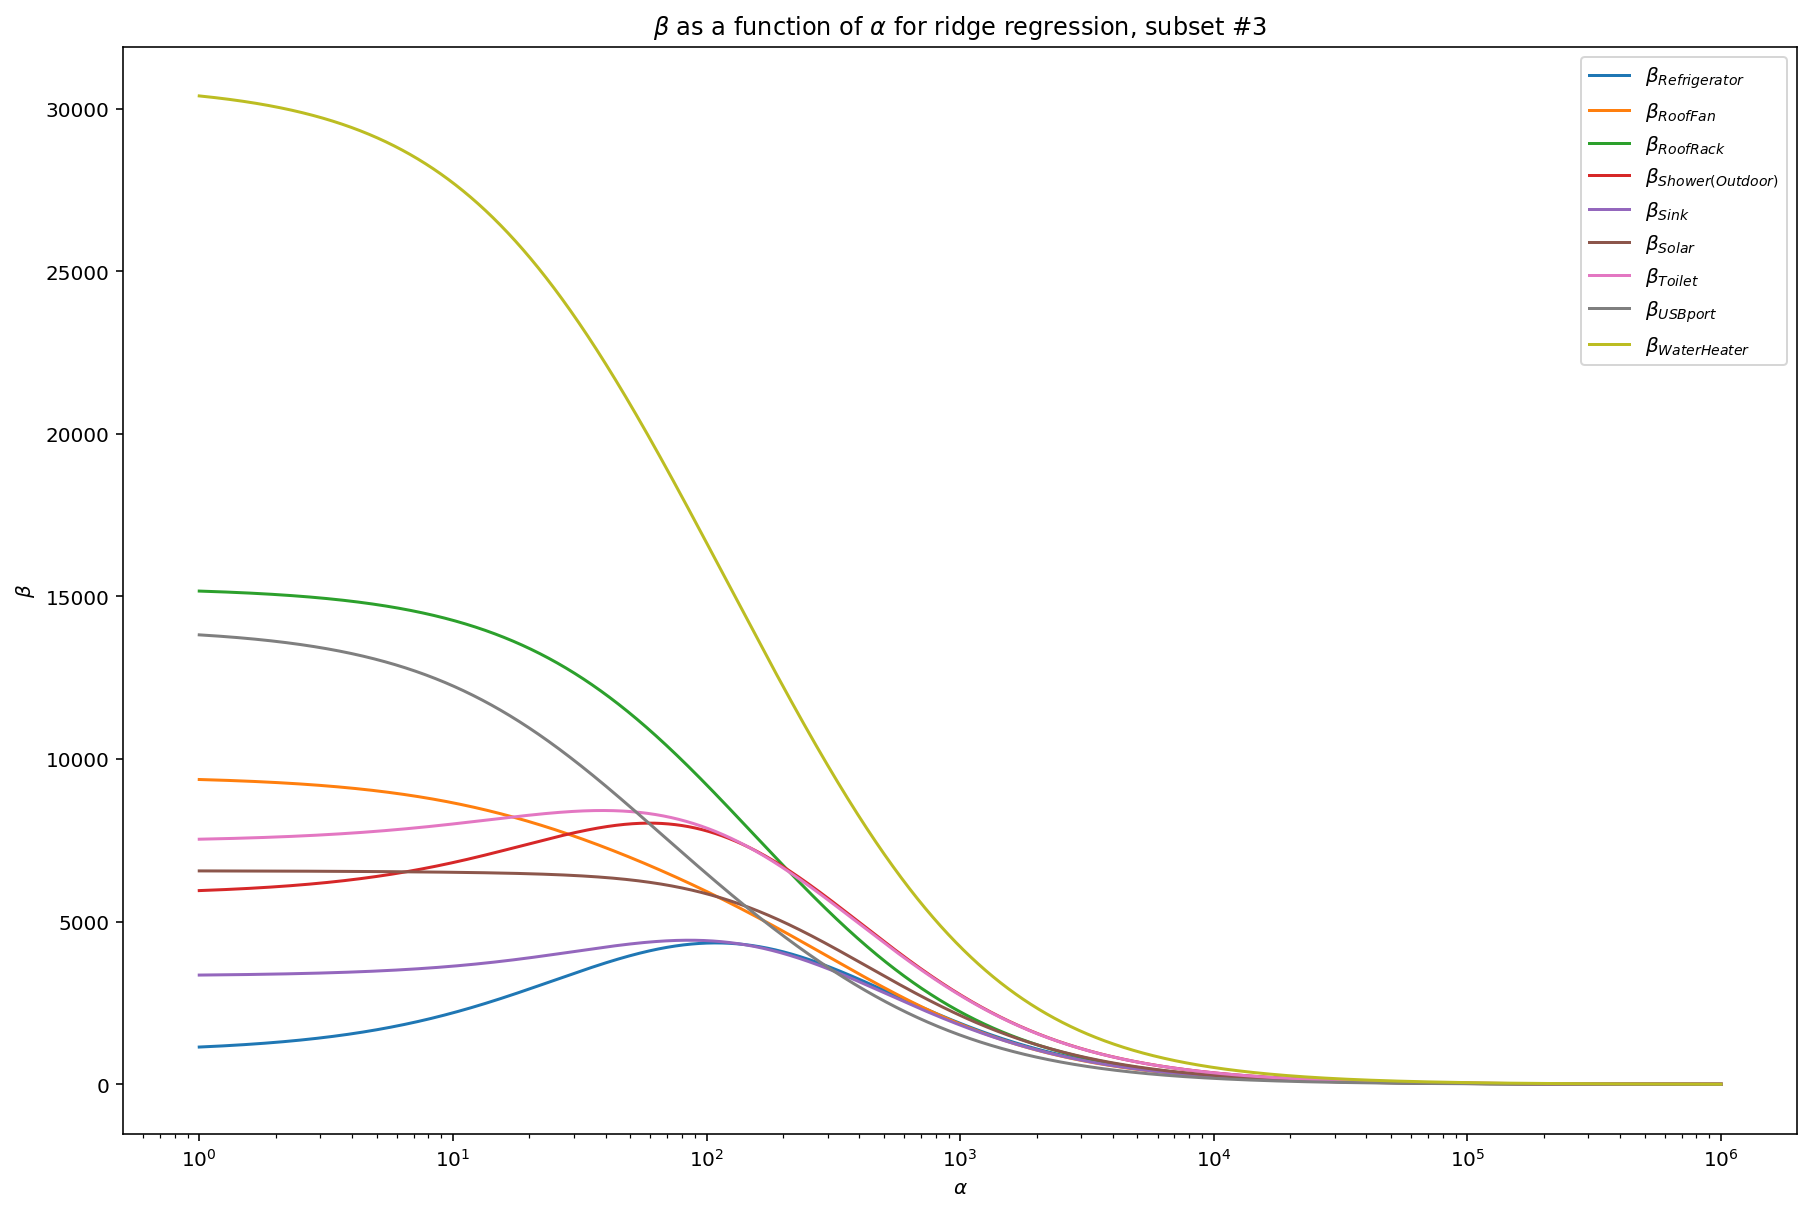

In [28]:
#subset3
nalphas = 10000
min_alpha_exp = 0
max_alpha_exp = 6
n_features = len(feats_subset3.columns)
coefs = np.zeros((n_alphas, n_features))
alphas = np.logspace(min_alpha_exp, max_alpha_exp, n_alphas)
for i, alpha in enumerate(alphas):
    #model = Pipeline([('standardize', StandardScaler()), ('lasso', Lasso(alpha=alpha))])
    model = Ridge(alpha=alpha)
    model.fit(feats_subset3,train_target_all_features)
    #coefs[i] = model.steps[1][1].coef_
    coefs[i] = model.coef_
    
columns = list(feats_subset3.columns)
fig, ax = plt.subplots(figsize=(15,10))

for feature in range(n_features):
    sns.lineplot(alphas, coefs[:, feature], label="$\\beta_{{{}}}$".format(columns[feature]))

ax.set_xscale('log')
ax.set_title('$\\beta$ as a function of $\\alpha$ for ridge regression, subset #3')
ax.set_xlabel('$\\alpha$')
ax.set_ylabel('$\\beta$')
ax.legend(loc='upper right') 

In [29]:
#ridge_features.append('Water Heater')
#ridge_features.append('Toilet')

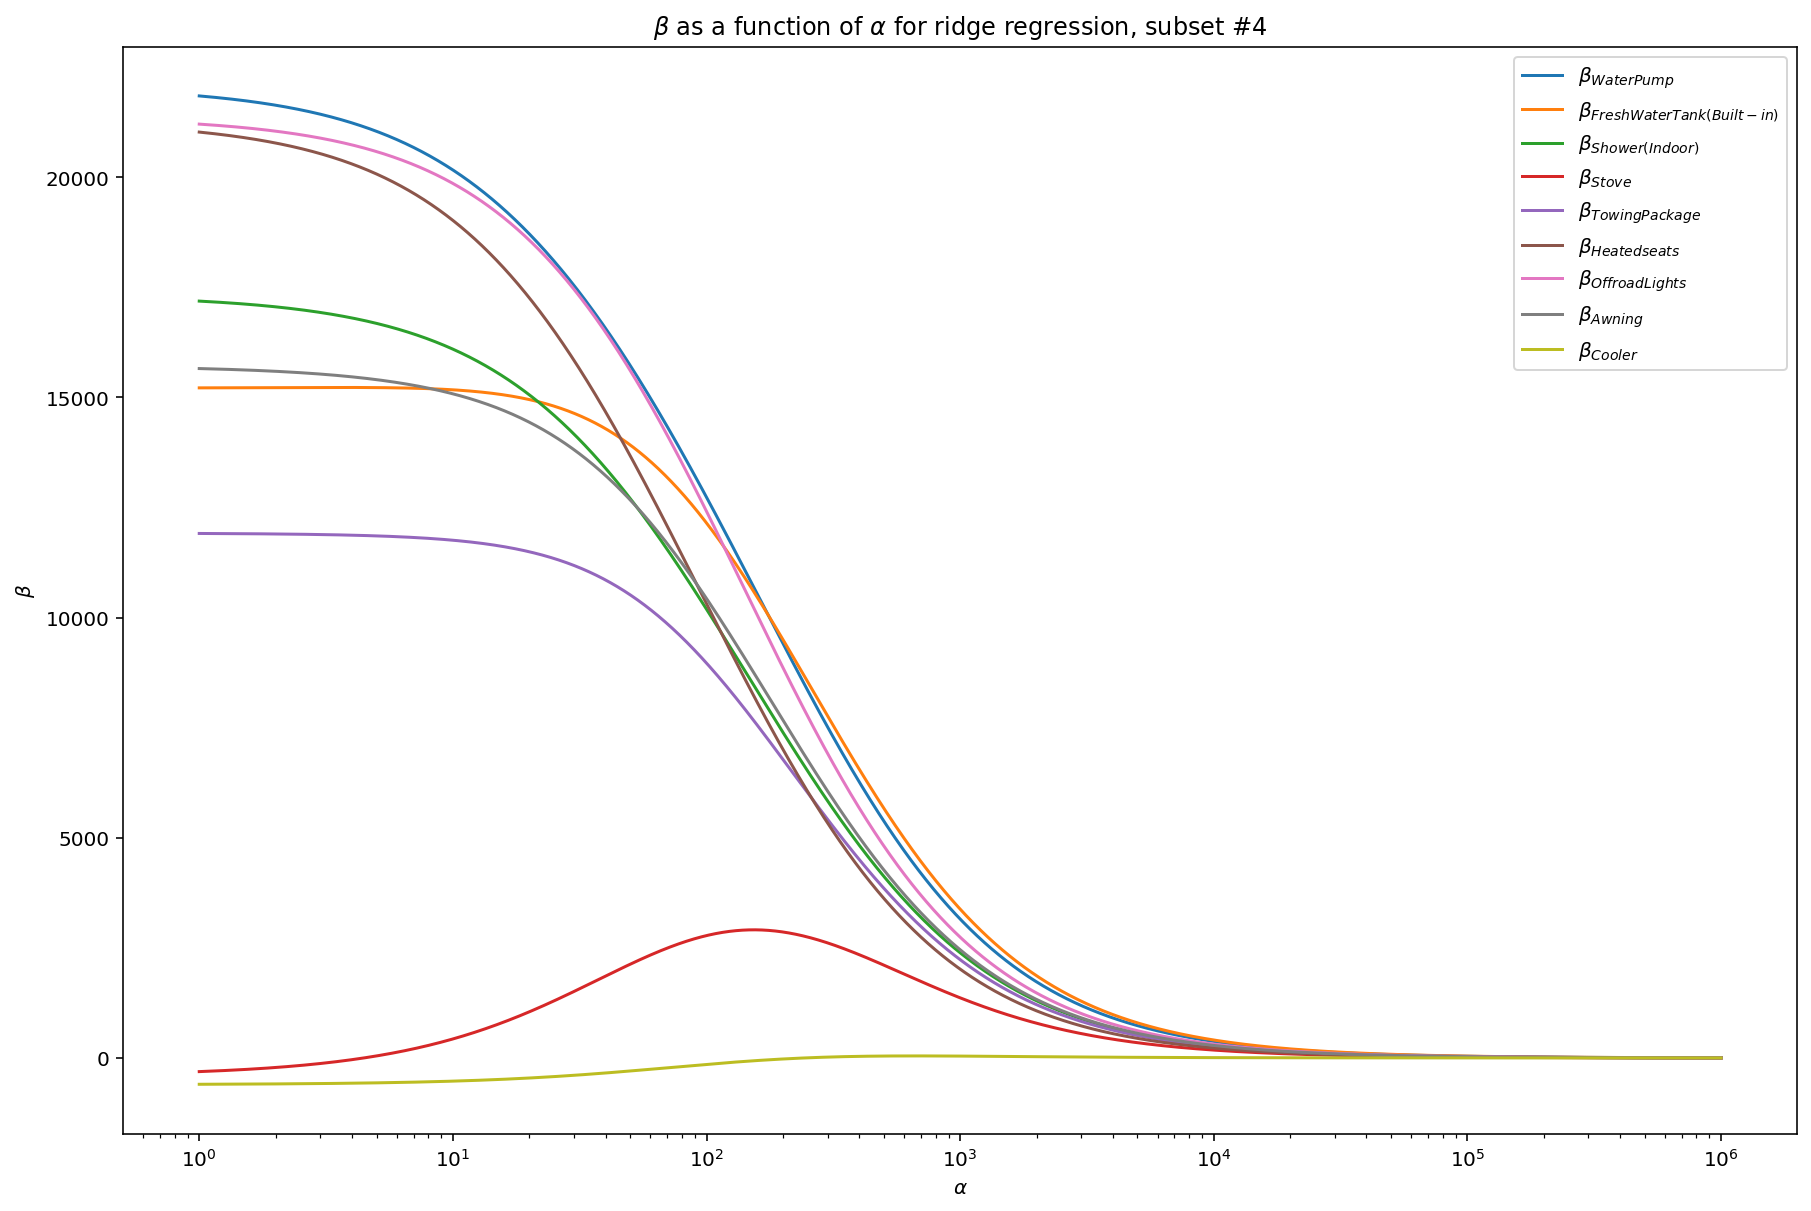

In [30]:
#subset4
nalphas = 10000
min_alpha_exp = 0
max_alpha_exp = 6
n_features = len(feats_subset4.columns)
coefs = np.zeros((n_alphas, n_features))
alphas = np.logspace(min_alpha_exp, max_alpha_exp, n_alphas)
for i, alpha in enumerate(alphas):
    #model = Pipeline([('standardize', StandardScaler()), ('lasso', Lasso(alpha=alpha))])
    model = Ridge(alpha=alpha)
    model.fit(feats_subset4,train_target_all_features)
    #coefs[i] = model.steps[1][1].coef_
    coefs[i] = model.coef_
    
columns = list(feats_subset4.columns)
fig, ax = plt.subplots(figsize=(15,10))

for feature in range(n_features):
    sns.lineplot(alphas, coefs[:, feature], label="$\\beta_{{{}}}$".format(columns[feature]))

ax.set_xscale('log')
ax.set_title('$\\beta$ as a function of $\\alpha$ for ridge regression, subset #4')
ax.set_xlabel('$\\alpha$')
ax.set_ylabel('$\\beta$')
ax.legend(loc='upper right') 

In [31]:
#ridge_features.append('Fresh Water Tank (Built-in)')
#ridge_features.append('Water Pump')

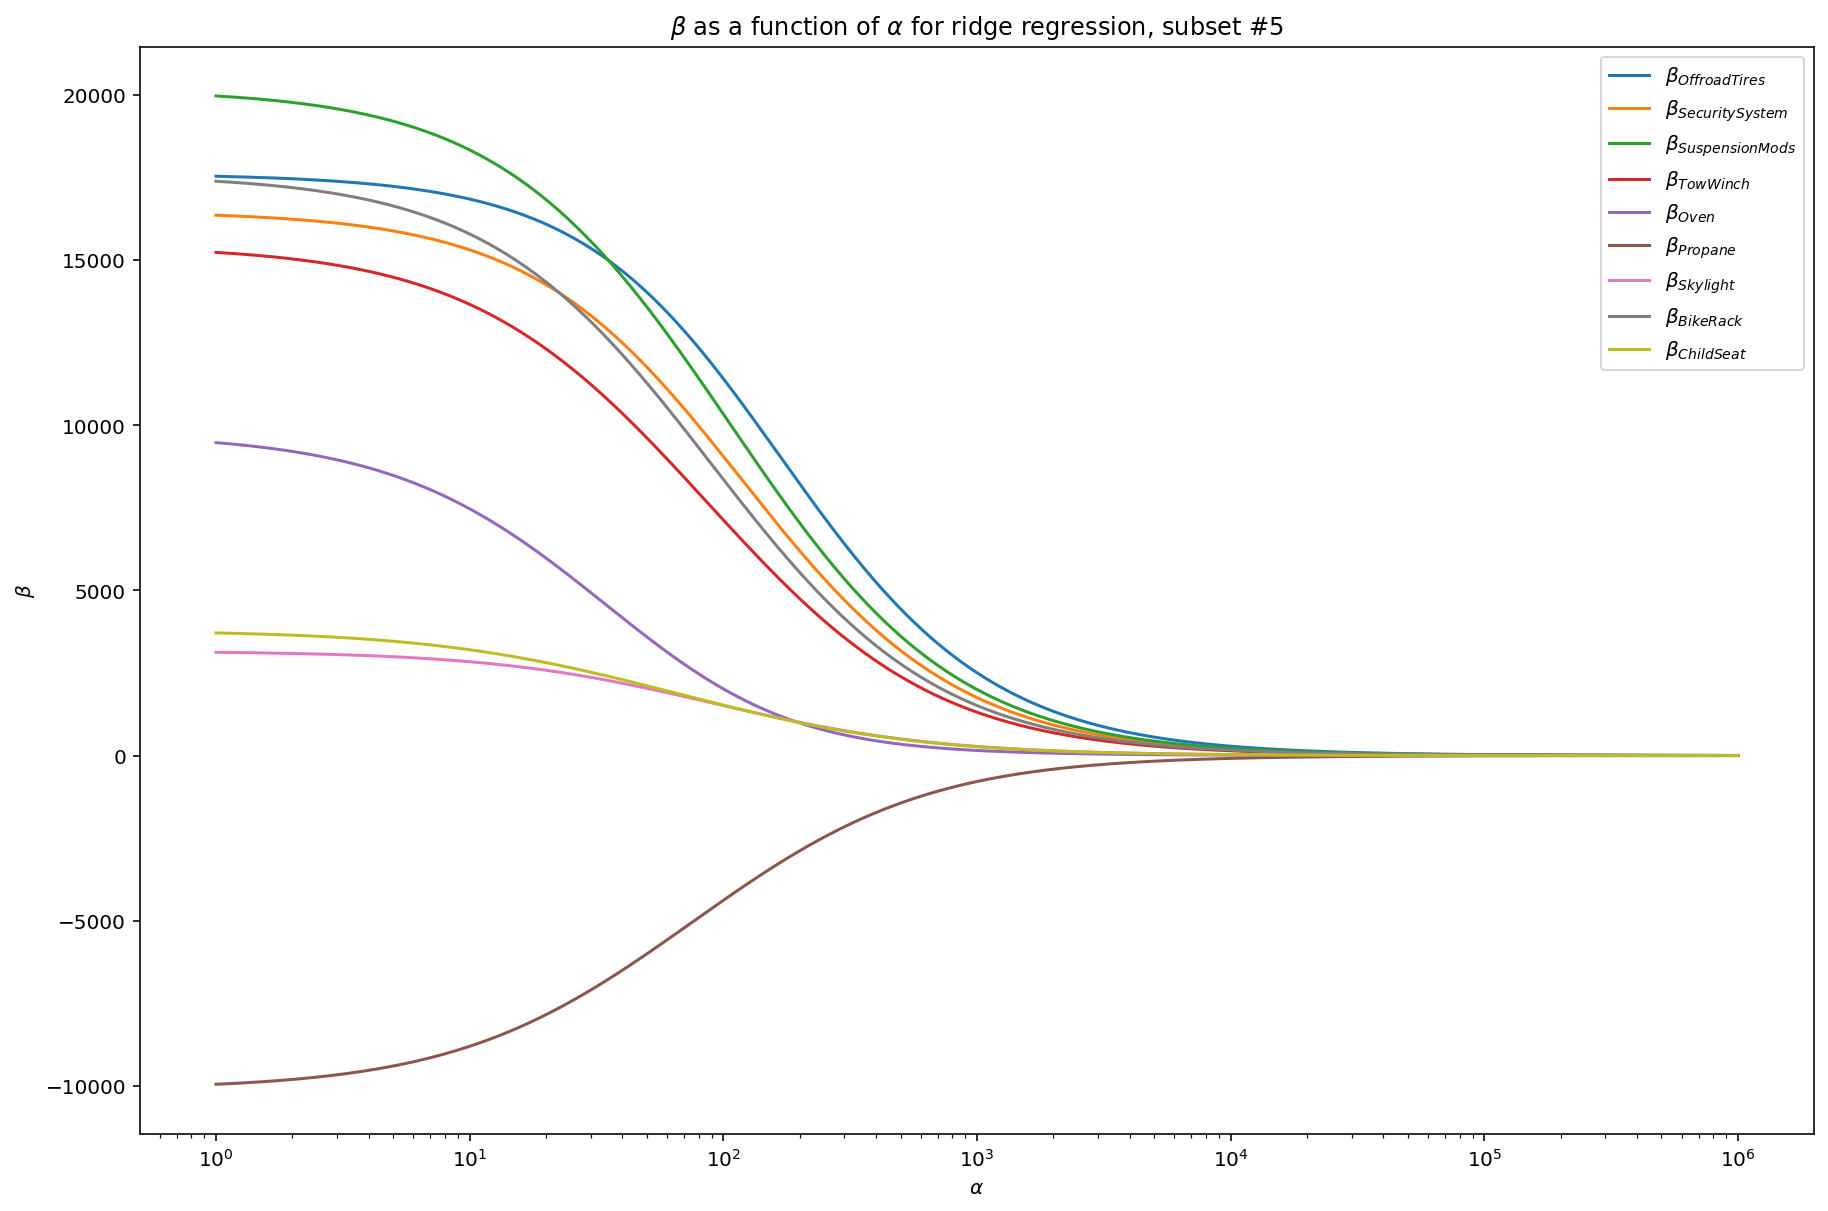

In [32]:
#subset5
nalphas = 10000
min_alpha_exp = 0
max_alpha_exp = 6
n_features = len(feats_subset5.columns)
coefs = np.zeros((n_alphas, n_features))
alphas = np.logspace(min_alpha_exp, max_alpha_exp, n_alphas)
for i, alpha in enumerate(alphas):
    #model = Pipeline([('standardize', StandardScaler()), ('lasso', Lasso(alpha=alpha))])
    model = Ridge(alpha=alpha)
    model.fit(feats_subset5,train_target_all_features)
    #coefs[i] = model.steps[1][1].coef_
    coefs[i] = model.coef_
    
columns = list(feats_subset5.columns)
fig, ax = plt.subplots(figsize=(15,10))

for feature in range(n_features):
    sns.lineplot(alphas, coefs[:, feature], label="$\\beta_{{{}}}$".format(columns[feature]))

ax.set_xscale('log')
ax.set_title('$\\beta$ as a function of $\\alpha$ for ridge regression, subset #5')
ax.set_xlabel('$\\alpha$')
ax.set_ylabel('$\\beta$')
ax.legend(loc='upper right') 

In [33]:
#ridge_features.append('Offroad Tires')
ridge_features.append('Suspension Mods')

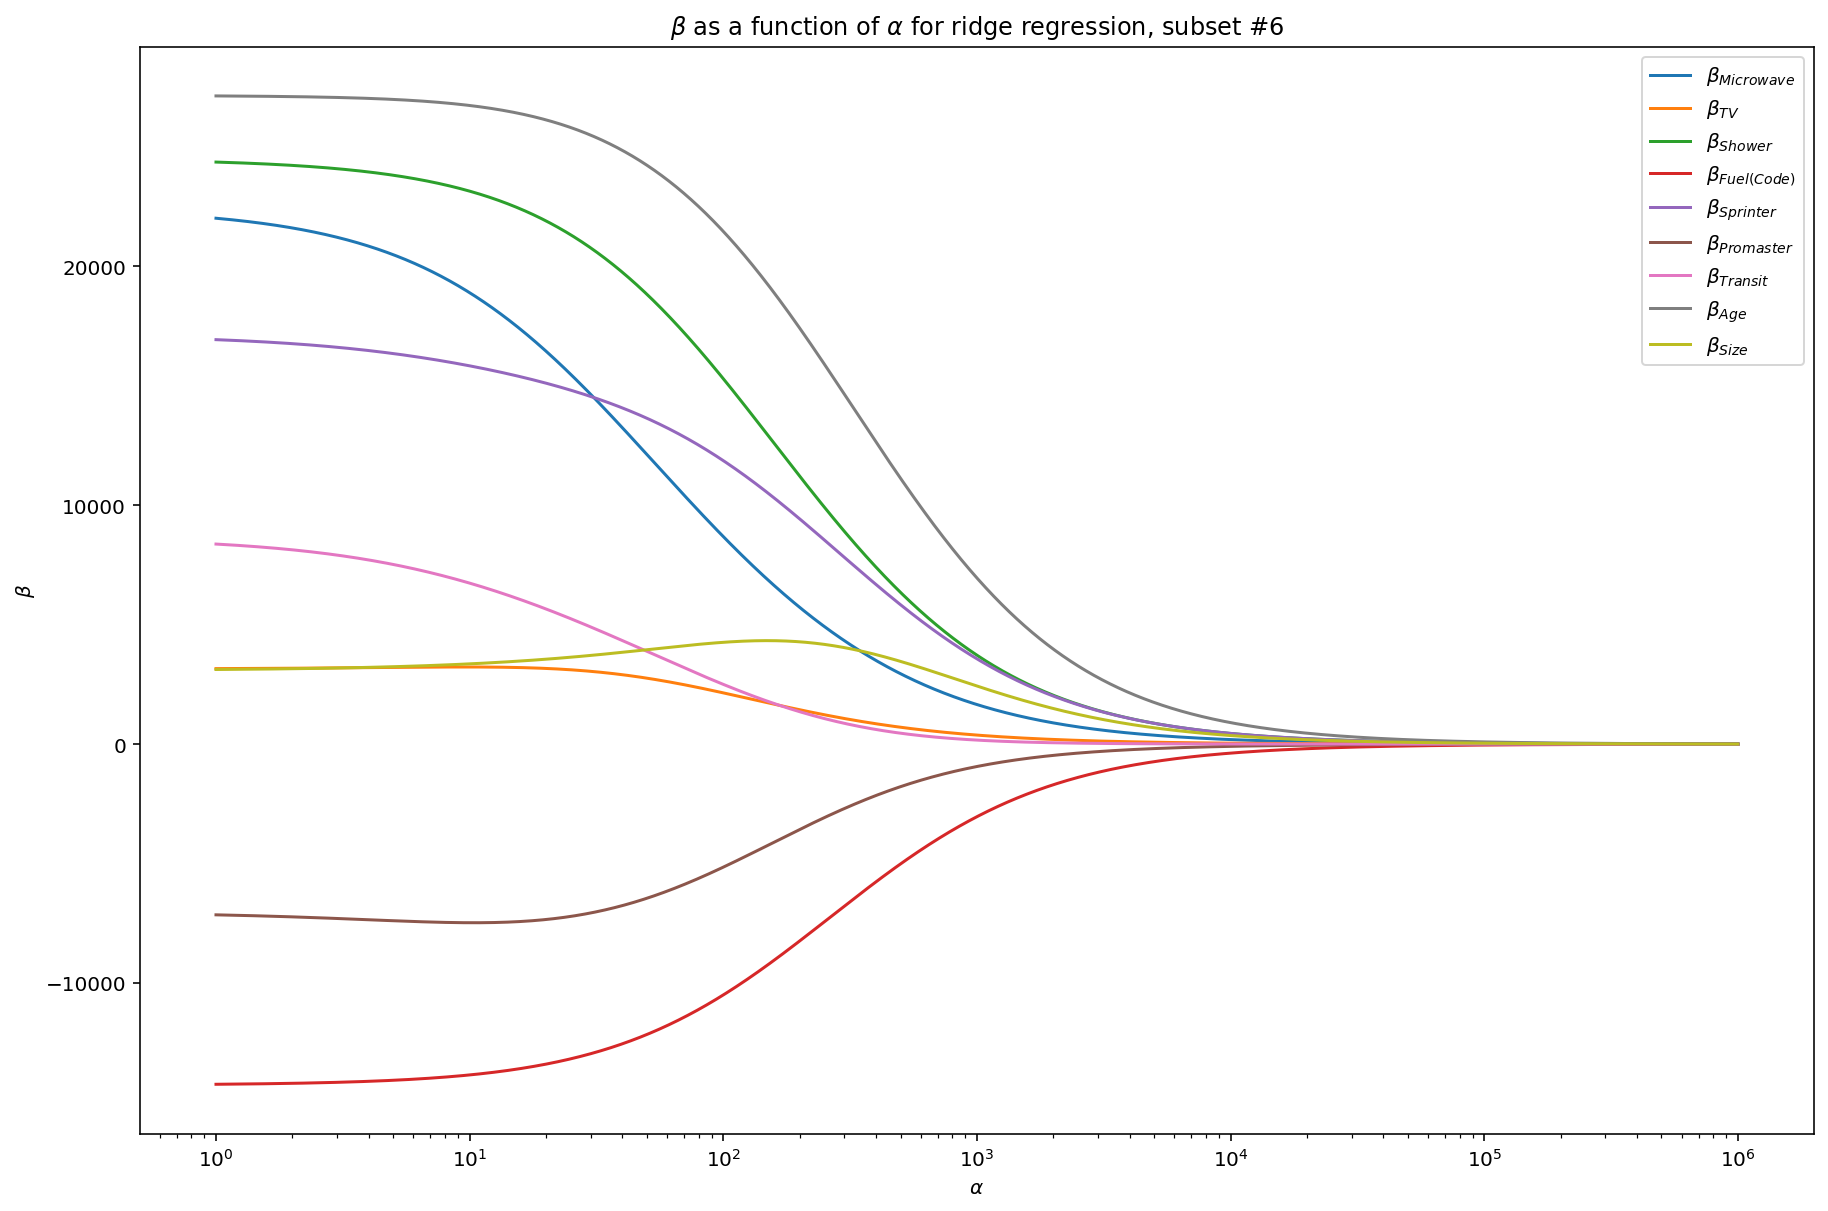

In [34]:
#subset6
nalphas = 10000
min_alpha_exp = 0
max_alpha_exp = 6
n_features = len(feats_subset6.columns)
coefs = np.zeros((n_alphas, n_features))
alphas = np.logspace(min_alpha_exp, max_alpha_exp, n_alphas)
for i, alpha in enumerate(alphas):
    #model = Pipeline([('standardize', StandardScaler()), ('lasso', Lasso(alpha=alpha))])
    model = Ridge(alpha=alpha)
    model.fit(feats_subset6,train_target_all_features)
    #coefs[i] = model.steps[1][1].coef_
    coefs[i] = model.coef_
    
columns = list(feats_subset6.columns)
fig, ax = plt.subplots(figsize=(15,10))

for feature in range(n_features):
    sns.lineplot(alphas, coefs[:, feature], label="$\\beta_{{{}}}$".format(columns[feature]))

ax.set_xscale('log')
ax.set_title('$\\beta$ as a function of $\\alpha$ for ridge regression, subset #6')
ax.set_xlabel('$\\alpha$')
ax.set_ylabel('$\\beta$')
ax.legend(loc='upper right') 

In [35]:
#ridge_features.append('Shower')
ridge_features.append('Sprinter')

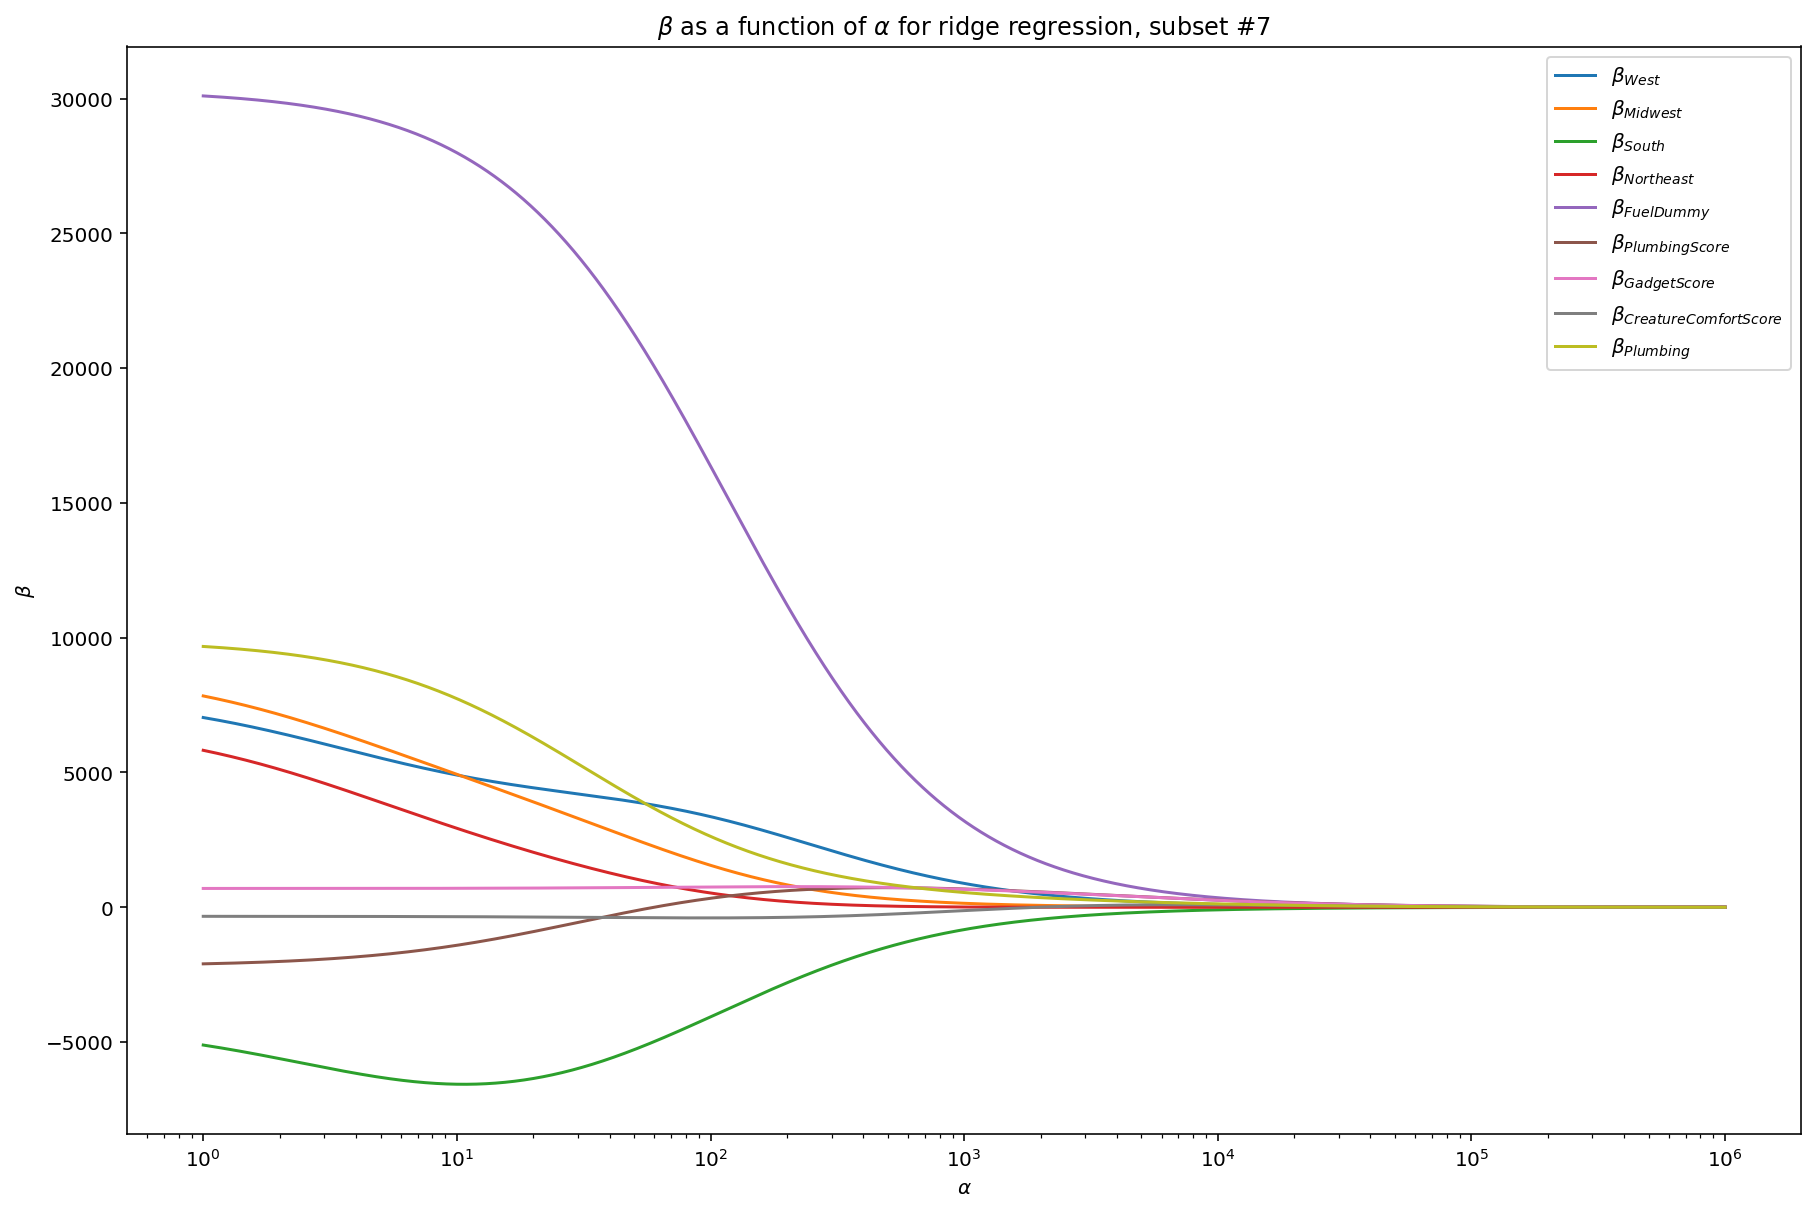

In [36]:
#subset7
nalphas = 10000
min_alpha_exp = 0
max_alpha_exp = 6
n_features = len(feats_subset7.columns)
coefs = np.zeros((n_alphas, n_features))
alphas = np.logspace(min_alpha_exp, max_alpha_exp, n_alphas)
for i, alpha in enumerate(alphas):
    #model = Pipeline([('standardize', StandardScaler()), ('lasso', Lasso(alpha=alpha))])
    model = Ridge(alpha=alpha)
    model.fit(feats_subset7,train_target_all_features)
    #coefs[i] = model.steps[1][1].coef_
    coefs[i] = model.coef_
    
columns = list(feats_subset7.columns)
fig, ax = plt.subplots(figsize=(15,10))

for feature in range(n_features):
    sns.lineplot(alphas, coefs[:, feature], label="$\\beta_{{{}}}$".format(columns[feature]))

ax.set_xscale('log')
ax.set_title('$\\beta$ as a function of $\\alpha$ for ridge regression, subset #7')
ax.set_xlabel('$\\alpha$')
ax.set_ylabel('$\\beta$')
ax.legend(loc='upper right') 

In [37]:
ridge_features.append('West')
ridge_features.append('Fuel Dummy')
#ridge_features.append('Gadget Score')
#ridge_features.append('Plumbing Score')

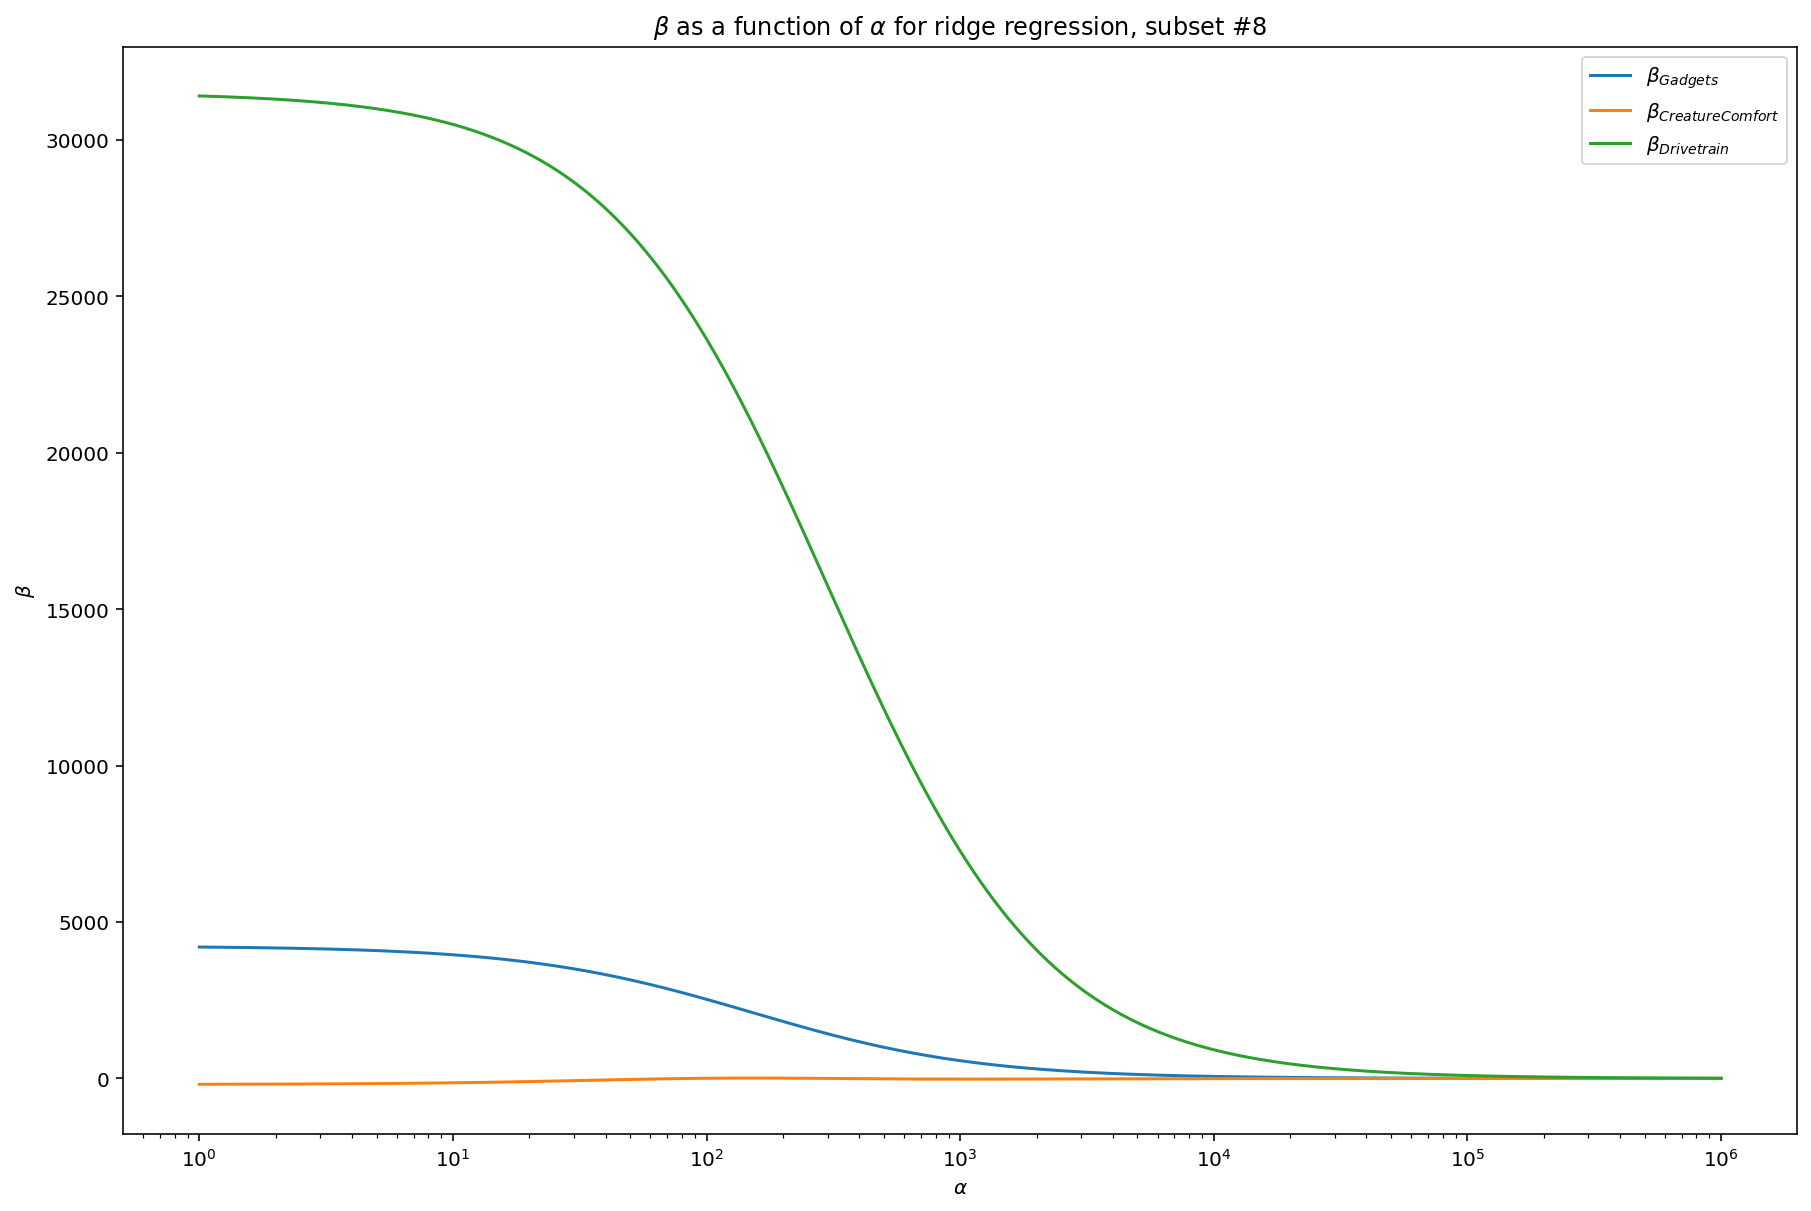

In [38]:
#subset8
nalphas = 10000
min_alpha_exp = 0
max_alpha_exp = 6
n_features = len(feats_subset8.columns)
coefs = np.zeros((n_alphas, n_features))
alphas = np.logspace(min_alpha_exp, max_alpha_exp, n_alphas)
for i, alpha in enumerate(alphas):
    #model = Pipeline([('standardize', StandardScaler()), ('lasso', Lasso(alpha=alpha))])
    model = Ridge(alpha=alpha)
    model.fit(feats_subset8,train_target_all_features)
    #coefs[i] = model.steps[1][1].coef_
    coefs[i] = model.coef_
    
columns = list(feats_subset8.columns)
fig, ax = plt.subplots(figsize=(15,10))

for feature in range(n_features):
    sns.lineplot(alphas, coefs[:, feature], label="$\\beta_{{{}}}$".format(columns[feature]))

ax.set_xscale('log')
ax.set_title('$\\beta$ as a function of $\\alpha$ for ridge regression, subset #8')
ax.set_xlabel('$\\alpha$')
ax.set_ylabel('$\\beta$')
ax.legend(loc='upper right') 

In [39]:
ridge_features.append('Drivetrain')

In [40]:
lasso_features

['Manufacturing Year',
 'Heater / Furnace',
 'Water Heater',
 'Roof Rack',
 'Fresh Water Tank (Built-in)',
 'Water Pump',
 'Suspension Mods',
 'Sprinter',
 'West',
 'Fuel Dummy',
 'Drivetrain']

In [41]:
ridge_features

['Manufacturing Year',
 'Heater / Furnace',
 'Suspension Mods',
 'Sprinter',
 'West',
 'Fuel Dummy',
 'Drivetrain']

In [42]:
lasso_xs = vans[lasso_features]
lasso_xs = sm.add_constant(lasso_xs)

ridge_xs = vans[ridge_features]
ridge_xs = sm.add_constant(ridge_xs)

In [43]:
#lasso_xs.head()

In [44]:
# split the data 80/20 to test on the lasso set

lasso_xs_train, lasso_xs_test, target_train, target_test = train_test_split(lasso_xs, target, test_size=.2, random_state=42)

# fit model to training set

lasso_model = sm.OLS(target_train,lasso_xs_train)

vans_lasso = lasso_model.fit()
vans_lasso.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     99.88
Date:                Sat, 06 Nov 2021   Prob (F-statistic):          1.37e-114
Time:                        20:23:15   Log-Likelihood:                -5473.7
No. Observations:                 474   AIC:                         1.097e+04
Df Residuals:                     462   BIC:                         1.102e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                       -4.453e+06   3.27e+05    -13.633      0.000   -5.09e+06   -3.81e+06
Manufacturing Year           2227.1230    162.258     13.726      0.000    1908.268    2545.978
Heater / Furnace             8334.0208   2708.511      3.077      0.002    3011.494    1.37e+04
Water Heater                 1.767e+04   2986.016      5.918      0.000    1.18e+04    2.35e+04
Roof Rack                    6437.5866   2479.054      2.597      0.010    1565.967    1.13e+04
Fresh Water Tank (Built-in)  9694.1714   3161.914      3.066      0.002    3480.657    1.59e+04
Water Pump                   1.015e+04   3427.580      2.961      0.003    3415.038    1.69e+04
Suspension Mods              1.006e+04   3473.272      2.896      0.004    3233.170    1.69e+04
Sprinter                     1.234e+04   4168.474      2.960      0.003    4148.611    2.05e+04
West                         7019.2008   2406.612      2.917      0.004    2289.938    1.17e+04
Fuel Dummy                   3735.9684   4093.150      0.913      0.362   -4307.529    1.18e+04
Drivetrain                   1.847e+04   1754.674     10.525      0.000     1.5e+04    2.19e+04
==============================================================================
Omnibus:                       70.676   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              130.573
Skew:                           0.864   Prob(JB):                     4.43e-29
Kurtosis:                       4.903   Cond. No.                     5.64e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.64e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
#model1_mae = mean_absolute_error(

In [46]:
lasso_model2 = LinearRegression()
lasso_regression = lasso_model2.fit(lasso_xs_train,target_train)

r_squared_train = lasso_model2.score(lasso_xs_train, target_train)
r_squared_test = lasso_model2.score(lasso_xs_test, target_test)

predictions = lasso_model2.predict(lasso_xs_test)

mae1 = mean_absolute_error(predictions, target_test)
rmse1 = np.sqrt(mean_squared_error(predictions, target_test))

print(f'R^2 for the training data is {r_squared_train}')
print(f'R^2 for the test data is {r_squared_test}')
print(f'The difference is {r_squared_train - r_squared_test}.')

print(f'The Mean Absolute Error is {mae1}')
print(f'The Root Mean Squared Error is {rmse1}')
print(f'The normalized RMSE is {rmse1/(predictions.max() - predictions.min())}')

R^2 for the training data is 0.703965428783938
R^2 for the test data is 0.7009163751565096
The difference is 0.0030490536274283553.
The Mean Absolute Error is 17367.162403689494
The Root Mean Squared Error is 22431.24618291577
The normalized RMSE is 0.1314916832657867


It looks like MPG, Bluetooth, Offroad Tires, and Shower can be dropped from the lasso set.

In [47]:
lasso_xs2 = vans[lasso_features]
#lasso_xs2.drop(columns=['Fuel Efficiency (Highway)','Offroad Tires','Bluetooth / Wifi','Shower','Plumbing Score','Gadget Score'], inplace=True)
lasso_xs2.drop(columns=['Fuel Dummy'], inplace=True)
lasso_xs2 = sm.add_constant(lasso_xs2)

In [48]:
# split the data 80/20 to test on the reduced lasso set

lasso_xs_train2, lasso_xs_test2, target_train2, target_test2 = train_test_split(lasso_xs2, target, test_size=.2, random_state=42)

# fit model to training set

lasso_model3 = sm.OLS(target_train2,lasso_xs_train2)

vans_lasso2 = lasso_model3.fit()
vans_lasso2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     109.8
Date:                Sat, 06 Nov 2021   Prob (F-statistic):          1.93e-115
Time:                        20:23:15   Log-Likelihood:                -5474.2
No. Observations:                 474   AIC:                         1.097e+04
Df Residuals:                     463   BIC:                         1.102e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                       -4.362e+06   3.11e+05    -14.029      0.000   -4.97e+06   -3.75e+06
Manufacturing Year           2182.0499    154.533     14.120      0.000    1878.377    2485.723
Heater / Furnace             8563.7194   2696.308      3.176      0.002    3265.202    1.39e+04
Water Heater                  1.78e+04   2982.066      5.970      0.000    1.19e+04    2.37e+04
Roof Rack                    6491.6537   2477.900      2.620      0.009    1622.331    1.14e+04
Fresh Water Tank (Built-in)  9704.5917   3161.323      3.070      0.002    3492.273    1.59e+04
Water Pump                   1.001e+04   3423.354      2.923      0.004    3279.848    1.67e+04
Suspension Mods                  1e+04   3472.091      2.881      0.004    3178.863    1.68e+04
Sprinter                     1.528e+04   2650.053      5.765      0.000    1.01e+04    2.05e+04
West                         7091.1065   2404.889      2.949      0.003    2365.257    1.18e+04
Drivetrain                   1.868e+04   1739.162     10.740      0.000    1.53e+04    2.21e+04
==============================================================================
Omnibus:                       70.476   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              130.548
Skew:                           0.861   Prob(JB):                     4.49e-29
Kurtosis:                       4.909   Cond. No.                     5.37e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.37e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
lasso_model4 = LinearRegression()
lasso_regression3 = lasso_model4.fit(lasso_xs_train2,target_train2)

r_squared_train3 = lasso_regression3.score(lasso_xs_train2, target_train2)
r_squared_test3 = lasso_regression3.score(lasso_xs_test2, target_test2)

print(f'R^2 for the training data is {r_squared_train3}')
print(f'R^2 for the test data is {r_squared_test3}')
print(f'The difference is {r_squared_train3 - r_squared_test3}.')

predictions2 = lasso_model4.predict(lasso_xs_test2)
mae2 = mean_absolute_error(predictions2, target_test2)
rmse2 = np.sqrt(mean_squared_error(predictions2, target_test2))

print(f'The Mean Absolute Error is {mae2}')
print(f'The Root Mean Squared Error is {rmse2}')
print(f'The normalized RMSE is {rmse2/(predictions2.max() - predictions2.min())}')

R^2 for the training data is 0.7034316127400888
R^2 for the test data is 0.6986422991144258
The difference is 0.004789313625663039.
The Mean Absolute Error is 17279.47045989708
The Root Mean Squared Error is 22516.36244831851
The normalized RMSE is 0.13297665984798257


In [50]:
# split the data 80/20 to test on the ridge set

ridge_xs_train, ridge_xs_test, target_train3, target_test3 = train_test_split(ridge_xs, target, test_size=.2, random_state=42)

# fit model to training set

ridge_model = sm.OLS(target_train2,ridge_xs_train)
vans_ridge = ridge_model.fit()
vans_ridge.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     106.5
Date:                Sat, 06 Nov 2021   Prob (F-statistic):           1.58e-92
Time:                        20:23:15   Log-Likelihood:                -5535.8
No. Observations:                 474   AIC:                         1.109e+04
Df Residuals:                     466   BIC:                         1.112e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -5.1e+06   3.64e+05    -14.016      0.000   -5.81e+06   -4.38e+06
Manufacturing Year  2556.6772    180.612     14.156      0.000    2201.762    2911.592
Heater / Furnace    2.102e+04   2795.802      7.519      0.000    1.55e+04    2.65e+04
Suspension Mods     1.541e+04   3906.391      3.945      0.000    7732.627    2.31e+04
Sprinter            1.323e+04   4720.186      2.804      0.005    3959.028    2.25e+04
West                5951.6424   2715.041      2.192      0.029     616.403    1.13e+04
Fuel Dummy          4505.1468   4635.705      0.972      0.332   -4604.327    1.36e+04
Drivetrain          1.789e+04   1977.951      9.047      0.000     1.4e+04    2.18e+04
==============================================================================
Omnibus:                       55.573   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.595
Skew:                           0.784   Prob(JB):                     7.04e-19
Kurtosis:                       4.333   Cond. No.                     5.54e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.54e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

I can drop Shower, Water Pump, Bluetooth/Wifi and MPG from the ridge set.

In [51]:
ridge_xs2 = vans[ridge_features]
#ridge_xs2.drop(columns=['Fuel Efficiency (Highway)','Water Pump','Bluetooth / Wifi','Shower', 'Gadget Score', 'Plumbing Score'], inplace=True)
ridge_xs2.drop(columns=['Fuel Dummy'], inplace=True)
ridge_xs2 = sm.add_constant(ridge_xs2)

In [52]:
ridge_model2 = LinearRegression()
ridge_regression = ridge_model2.fit(ridge_xs_train,target_train3)

r_squared_train3 = ridge_model2.score(ridge_xs_train, target_train3)
r_squared_test3 = ridge_model2.score(ridge_xs_test, target_test3)

print(f'R^2 for the training data is {r_squared_train3}')
print(f'R^2 for the test data is {r_squared_test3}')
print(f'The difference is {r_squared_train3 - r_squared_test3}.')

predictions3 = ridge_model2.predict(ridge_xs_test)
mae3 = mean_absolute_error(predictions3, target_test3)
rmse3 = np.sqrt(mean_squared_error(predictions3, target_test3))

print(f'The Mean Absolute Error is {mae3}')
print(f'The Root Mean Squared Error is {rmse3}')
print(f'The normalized RMSE is {rmse3/(predictions3.max() - predictions3.min())}')

R^2 for the training data is 0.6153606460192229
R^2 for the test data is 0.5582669223444348
The difference is 0.057093723674788155.
The Mean Absolute Error is 21477.18074797605
The Root Mean Squared Error is 27260.70257923997
The normalized RMSE is 0.16216213227165055


In [53]:
# split the data 80/20 to test on the reduced ridge set

ridge_xs_train2, ridge_xs_test2, target_train4, target_test4 = train_test_split(ridge_xs2, target, test_size=.2, random_state=42)

# fit model to training set

ridge_model3 = sm.OLS(target_train4,ridge_xs_train2)

vans_ridge2 = ridge_model3.fit()
vans_ridge2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     124.1
Date:                Sat, 06 Nov 2021   Prob (F-statistic):           2.17e-93
Time:                        20:23:15   Log-Likelihood:                -5536.3
No. Observations:                 474   AIC:                         1.109e+04
Df Residuals:                     467   BIC:                         1.112e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               -4.99e+06   3.46e+05    -14.428      0.000   -5.67e+06   -4.31e+06
Manufacturing Year  2502.3879    171.746     14.570      0.000    2164.898    2839.878
Heater / Furnace    2.133e+04   2777.234      7.682      0.000    1.59e+04    2.68e+04
Suspension Mods     1.535e+04   3905.707      3.930      0.000    7676.276     2.3e+04
Sprinter            1.678e+04   2997.017      5.598      0.000    1.09e+04    2.27e+04
West                6026.9881   2713.772      2.221      0.027     694.271    1.14e+04
Drivetrain          1.816e+04   1959.427      9.266      0.000    1.43e+04     2.2e+04
==============================================================================
Omnibus:                       55.051   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.236
Skew:                           0.775   Prob(JB):                     8.43e-19
Kurtosis:                       4.346   Cond. No.                     5.27e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.27e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [54]:
ridge_model4 = LinearRegression()
ridge_regression3 = ridge_model4.fit(ridge_xs_train2,target_train4)

r_squared_train4 = ridge_regression3.score(ridge_xs_train2, target_train4)
r_squared_test4 = ridge_regression3.score(ridge_xs_test2, target_test4)

print(f'R^2 for the training data is {r_squared_train4}')
print(f'R^2 for the test data is {r_squared_test4}')
print(f'The difference is {r_squared_train4 - r_squared_test4}.')

predictions4 = ridge_model4.predict(ridge_xs_test2)
mae4 = mean_absolute_error(predictions4, target_test4)
rmse4 = np.sqrt(mean_squared_error(predictions4, target_test4))

print(f'The Mean Absolute Error is {mae4}')
print(f'The Root Mean Squared Error is {rmse4}')
print(f'The normalized RMSE is {rmse4/(predictions4.max() - predictions4.min())}')

R^2 for the training data is 0.614581077682613
R^2 for the test data is 0.5470073221800344
The difference is 0.0675737555025786.
The Mean Absolute Error is 21665.862813487987
The Root Mean Squared Error is 27605.948601129214
The normalized RMSE is 0.16155644131808872


### So both of my models are overfit and performing at roughly 50% accuracy on test sets. How else can I improve this??

## Feature Engineering Thoughts:

- [x] bucket Manufacturing Year ('Age')
- [x] make Wheel Base ordinal
- [x] make categories of binary features, maybe make them ordinal (no plumbing, basic plumbing, deluxe plumbing) 
  - apply simple boolean expressions to create feature groups
  - if that doesn't work, use .loc
  - .apply with a lambda function (set it up so that it rakes a whole row as input and returns a single value to a new column)
- [x] ordinate drivetrain column
  
  
### Making Predictions: How? 
- the two best model is lasso_model2
- [x] RMSE
- [x] MAE
- [x] Split the feature sets that are regularized
- [ ] Cross-validation of the selected model if there is time

In [55]:
lasso_features.append('Mileage')
lasso_xs3 = vans[lasso_features]
#lasso_xs2.drop(columns=['Fuel Efficiency (Highway)','Offroad Tires','Bluetooth / Wifi','Shower','Plumbing Score','Gadget Score'], inplace=True)
lasso_xs3.drop(columns=['Fuel Dummy'], inplace=True)
lasso_xs3 = sm.add_constant(lasso_xs3)

# split the data 80/20 to test on the lasso set

best_xs_train, best_xs_test, best_target_train, best_target_test = train_test_split(lasso_xs3, target, test_size=.2, random_state=42)

# fit model to training set

best_model = sm.OLS(best_target_train,best_xs_train)

best_fit = best_model.fit()
best_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     122.6
Date:                Sat, 06 Nov 2021   Prob (F-statistic):          2.20e-129
Time:                        20:23:15   Log-Likelihood:                -5438.5
No. Observations:                 474   AIC:                         1.090e+04
Df Residuals:                     462   BIC:                         1.095e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                       -2.769e+06   3.42e+05     -8.089      0.000   -3.44e+06    -2.1e+06
Manufacturing Year           1397.6805    169.695      8.236      0.000    1064.210    1731.151
Heater / Furnace             9219.5179   2504.850      3.681      0.000    4297.207    1.41e+04
Water Heater                 1.462e+04   2793.368      5.233      0.000    9128.408    2.01e+04
Roof Rack                    5991.7047   2301.622      2.603      0.010    1468.759    1.05e+04
Fresh Water Tank (Built-in)  9377.6583   2935.746      3.194      0.001    3608.589    1.51e+04
Water Pump                    1.09e+04   3180.475      3.426      0.001    4646.292    1.71e+04
Suspension Mods              7906.7936   3233.139      2.446      0.015    1553.313    1.43e+04
Sprinter                     1.799e+04   2480.662      7.253      0.000    1.31e+04    2.29e+04
West                         5899.8842   2237.336      2.637      0.009    1503.268    1.03e+04
Drivetrain                   1.664e+04   1632.091     10.192      0.000    1.34e+04    1.98e+04
Mileage                        -0.1821      0.021     -8.659      0.000      -0.223      -0.141
==============================================================================
Omnibus:                       66.653   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              133.904
Skew:                           0.789   Prob(JB):                     8.38e-30
Kurtosis:                       5.071   Cond. No.                     2.73e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.73e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [56]:
best_model2 = LinearRegression()
best_lr = best_model2.fit(best_xs_train,best_target_train)

best_r_squared_train = best_model2.score(best_xs_train, best_target_train)
best_r_squared_test = best_model2.score(best_xs_test, best_target_test)

best_predictions = best_model2.predict(best_xs_test)

best_mae = mean_absolute_error(best_predictions, best_target_test)
best_rmse = np.sqrt(mean_squared_error(best_predictions, best_target_test))

print(f'R^2 for the training data is {best_r_squared_train}')
print(f'R^2 for the test data is {best_r_squared_test}')
print(f'The difference is {best_r_squared_train - best_r_squared_test}.')
print('This model does not seem to be overfit!')
print('\n')
print(f'The Mean Absolute Error is {best_mae}')
print(f'The Root Mean Squared Error is {best_rmse}')
print(f'The normalized RMSE is {best_rmse/(best_predictions.max() - best_predictions.min())}')

R^2 for the training data is 0.7448396662688093
R^2 for the test data is 0.7150102188719344
The difference is 0.029829447396874875.
This model does not seem to be overfit!


The Mean Absolute Error is 16962.39174471206
The Root Mean Squared Error is 21896.350075077204
The normalized RMSE is 0.12388179779004767


In [57]:
# investigate VIF values

vif = pd.DataFrame()
vif['variable'] = lasso_xs3.columns
vif['vif'] =[variance_inflation_factor(lasso_xs3.values, i) for i in range(lasso_xs3.shape[1])]
vif

,variable,vif
0,const,112389.008418
1,Manufacturing Year,1.568256
2,Heater / Furnace,1.305546
3,Water Heater,1.623137
4,Roof Rack,1.104949
5,Fresh Water Tank (Built-in),1.685184
6,Water Pump,1.642191
7,Suspension Mods,1.191027
8,Sprinter,1.227141
9,West,1.042382


In [80]:
X = vans[lasso_features]
Y = vans['Price']

poly = PolynomialFeatures(degree=2)

best_X_train_poly = poly.fit_transform(best_xs_train.values)
best_X_test_poly = poly.fit_transform(best_xs_test.values)

lr_poly = LinearRegression()

In [81]:
lr_poly.fit(best_X_train_poly, best_target_train)
print(f'Second degree polynomial (training set) R^2: {lr_poly.score(best_X_train_poly, best_target_train)}')
print(f'Second degree polynomial (test set) R^2: {lr_poly.score(best_X_test_poly, best_target_test)}')

Second degree polynomial (training set) R^2: 0.8236417878075943
Second degree polynomial (test set) R^2: 0.7035281008412488
